In [1]:
import sys; sys.path.insert(0,'../../../mySoftware/MySoftwarePackage/mac'); from plot_tools import *
anafiles_dir = '/Users/erezcohen/Desktop/DensityFluctuations/AnaFiles/csv_files'
%matplotlib inline

# cardigraphic plot definition

In [2]:
def plot_cardiographic_plot( density , R = 2 , dR = 0.1 , particles = 'p' , color='blue'):
    with sns.axes_style("white"):
        y = density['rho_%s'%particles]
        g = sns.JointGrid(x=density['Sample No.'], y=y,
                          xlim=(0,len(density)),
#                           ylim=(density['rho_%s'%particles].min()-1,density['rho_%s'%particles].max()+1),
                         size = 8 )
        g.ax_marg_x.hist(density['Sample No.'],histtype='step',linewidth=0.01)
        g.ax_marg_y.hist(y, orientation="horizontal",color=color)
        g.plot_joint(sns.regplot,color=color)
        g.set_axis_labels('configuration','# %s'%particles)
        g.fig.suptitle('%s, %.2f < R < %.2f fm'%(particles,R-dR,R+dR),fontsize=20)


def three_cardiographic_plots( density , R = 2 , dR = 0.1 ):
    plot_cardiographic_plot( density , R=R , dR=dR , particles='p' , color='blue' )
    plot_cardiographic_plot( density , R=R , dR=dR , particles='n' , color='green' )
    plot_cardiographic_plot( density , R=R , dR=dR , particles='N' , color='black' )

# load data
take Massimo configuations and add some variables, that are generated using 

python mac/calc_massi_configurations.py --option=read -evf=0.001 -p1 -v3

In [3]:
A = 12
Np = 6
Nn = 6
NppPairs =  float(Np*(Np-1))/2
NnnPairs =  float(Nn*(Nn-1))/2
NpnPairs =  float(Np*Nn)
NNNPairs = float(A*(A-1))/2
print 'NppPairs:',NppPairs
print 'NnnPairs:',NnnPairs
print 'NpnPairs:',NpnPairs
print 'NNNPairs:',NNNPairs

NppPairs: 15.0
NnnPairs: 15.0
NpnPairs: 36.0
NNNPairs: 66.0


In [4]:
configurations_name='c12-ico6-10k_rd200'
configurations = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/SingleParticle/%s.csv'%configurations_name)

In [5]:
nuclei = []
for i in xrange(int(len(configurations.groupby('nucleus_counter')))):
    nucleus = configurations[configurations.nucleus_counter==i]
    nuclei.append(nucleus)
    if (i%1000==0): print 'i:',i
print 'done, len(nuclei):',len(nuclei)

i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000
done, len(nuclei): 10000


NN-distances data. Takes a lot of time to read so don't use by default...

pp_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico3-skin-10k_pp.csv')
pn_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico3-skin-10k_pn.csv')
nn_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico3-skin-10k_nn.csv')
NN_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/pb208-ico3-skin-10k_NN_all.csv')

In [6]:
pp_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/c12-ico6-10k_rd200_pp.csv')
pn_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/c12-ico6-10k_rd200_pn.csv')
nn_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/c12-ico6-10k_rd200_nn.csv')
NN_distances = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/c12-ico6-10k_rd200_NN_all.csv')


tab completion not implemented for this context

tab completion not implemented for this context

tab completion not implemented for this context

tab completion not implemented for this context


# single - body
lets look on the single-body density as a function of the distance from the center of the nucleus

In [11]:
# Pb208 from Massi' note
R = np.linspace(0,14,100)
R_0_p , a_p , Np = 6.68  , 0.447 , 82
R_0_n , a_n , Nn = 6.7 , 0.55 , 126
rho_0 = 0.16 
rho_WS_p = [rho_0*(float(Np)/(Np+Nn))/(1+exp((R[i]-R_0_p)/a_p)) for i in range(len(R))]
rho_WS_n = [rho_0*(float(Nn)/(Np+Nn))/(1+exp((R[i]-R_0_n)/a_n)) for i in range(len(R))]
rho_WS_all = [rho_WS_p[i] + rho_WS_n[i] for i in range(len(R))]

In [7]:
# C12 from Massi' note p.2 eq. (7)
R = np.array(np.linspace(0,14,100))
R_0 , a , W = 2.335  , 0.552 ,  -0.149
rho_0 = 0.185
rho_WS_p = rho_0*(float(Np)/(Np+Nn)) * (1+W*np.square(R)/np.square(R_0))/(1 + np.exp((R-R_0)/a)) 
rho_WS_n = rho_WS_p
rho_WS_all = rho_WS_p + rho_WS_n

normalization: 6101.69491525
protons: 5.95374054736
neutrons: 5.9514561496
nucleons: 11.905196697


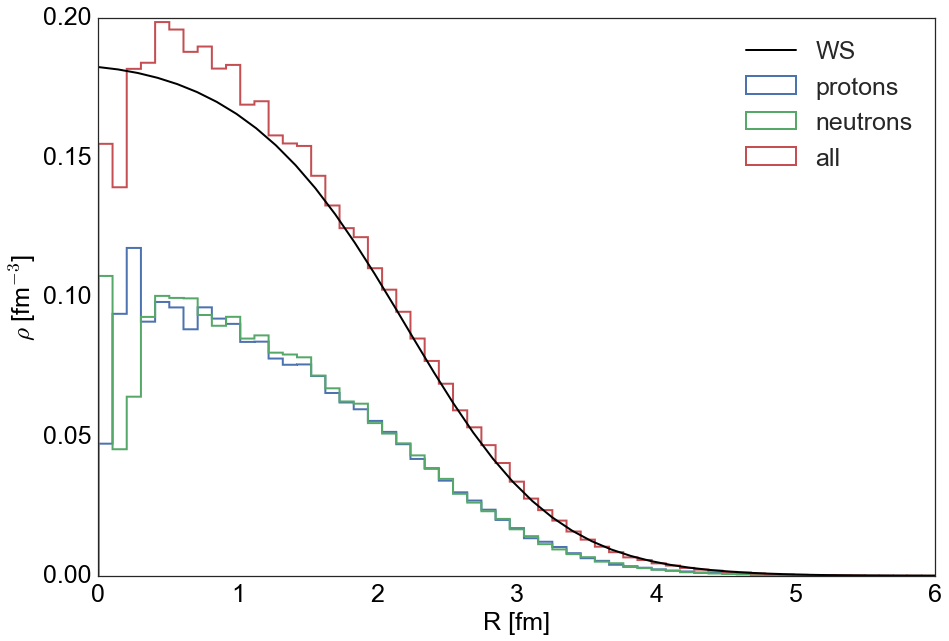

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
neutrons , protons = configurations[configurations['type']=='neutron'] , configurations[configurations['type']=='proton']
bins = np.linspace(0,6,60)
N = (bins[1]-bins[0])*Np*len(configurations)/((Np+Nn))#len(configurations.groupby('nucleus_counter'))*Np
print 'normalization:',N
hp,bins,_ = plt.hist(protons.R , weights=(float(Np)/(Np+Nn))/(N*protons.R*protons.R) , bins=bins, histtype='step', label='protons',linewidth=2);
hn,bins,_ = plt.hist(neutrons.R , weights=(float(Nn)/(Np+Nn))/(N*neutrons.R*neutrons.R) , bins=bins, histtype='step' , label='neutrons',linewidth=2);
hN,bins,_ = plt.hist(configurations.R , weights=(float(Np)/(Np+Nn))/(N*configurations.R*configurations.R) , bins=bins, histtype='step', label='all',linewidth=2);
plt.plot(R , rho_WS_all , label='WS', color='black',linewidth=2);
set_axes(ax,'R [fm]','$\\rho$ [fm$^{-3}$]')
ax.set_xlim(0,6)
ax.set_ylim(0,0.2)
plt.legend(fontsize=25)
# normalization
integrand_p = [4*3.1415*bins[i]*bins[i]*(bins[i+1]-bins[i])*hp[i] for i in range(len(bins)-1)]
print "protons:",sum(integrand_p)
integrand_n = [4*3.1415*bins[i]*bins[i]*(bins[i+1]-bins[i])*hn[i] for i in range(len(bins)-1)]
print "neutrons:",sum(integrand_n)
integrand_N = [4*3.1415*bins[i]*bins[i]*(bins[i+1]-bins[i])*hN[i] for i in range(len(bins)-1)]
print "nucleons:",sum(integrand_N)

(0, 0.2)

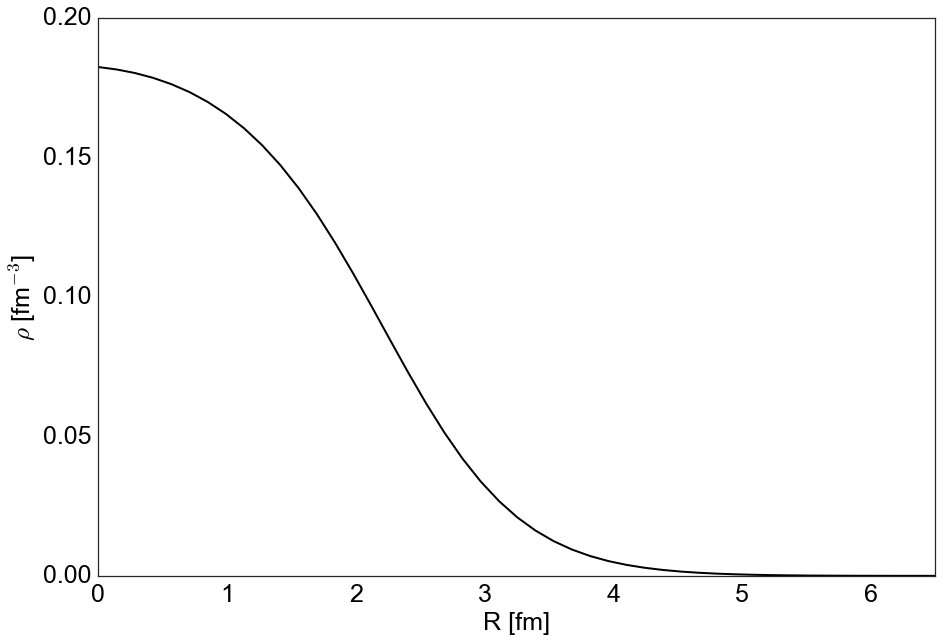

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
# sns.distplot(configurations.R,hist=False,color=None,ax=ax);
plt.plot(R , rho_WS_all , label='WS', color='black',linewidth=2);
set_axes(ax,'R [fm]','$\\rho$ [fm$^{-3}$]')
ax.set_xlim(0,6.5)
ax.set_ylim(0,0.2)

# two - body
collect all nucleons from each nucleus and calculate the inter-nucleon distances

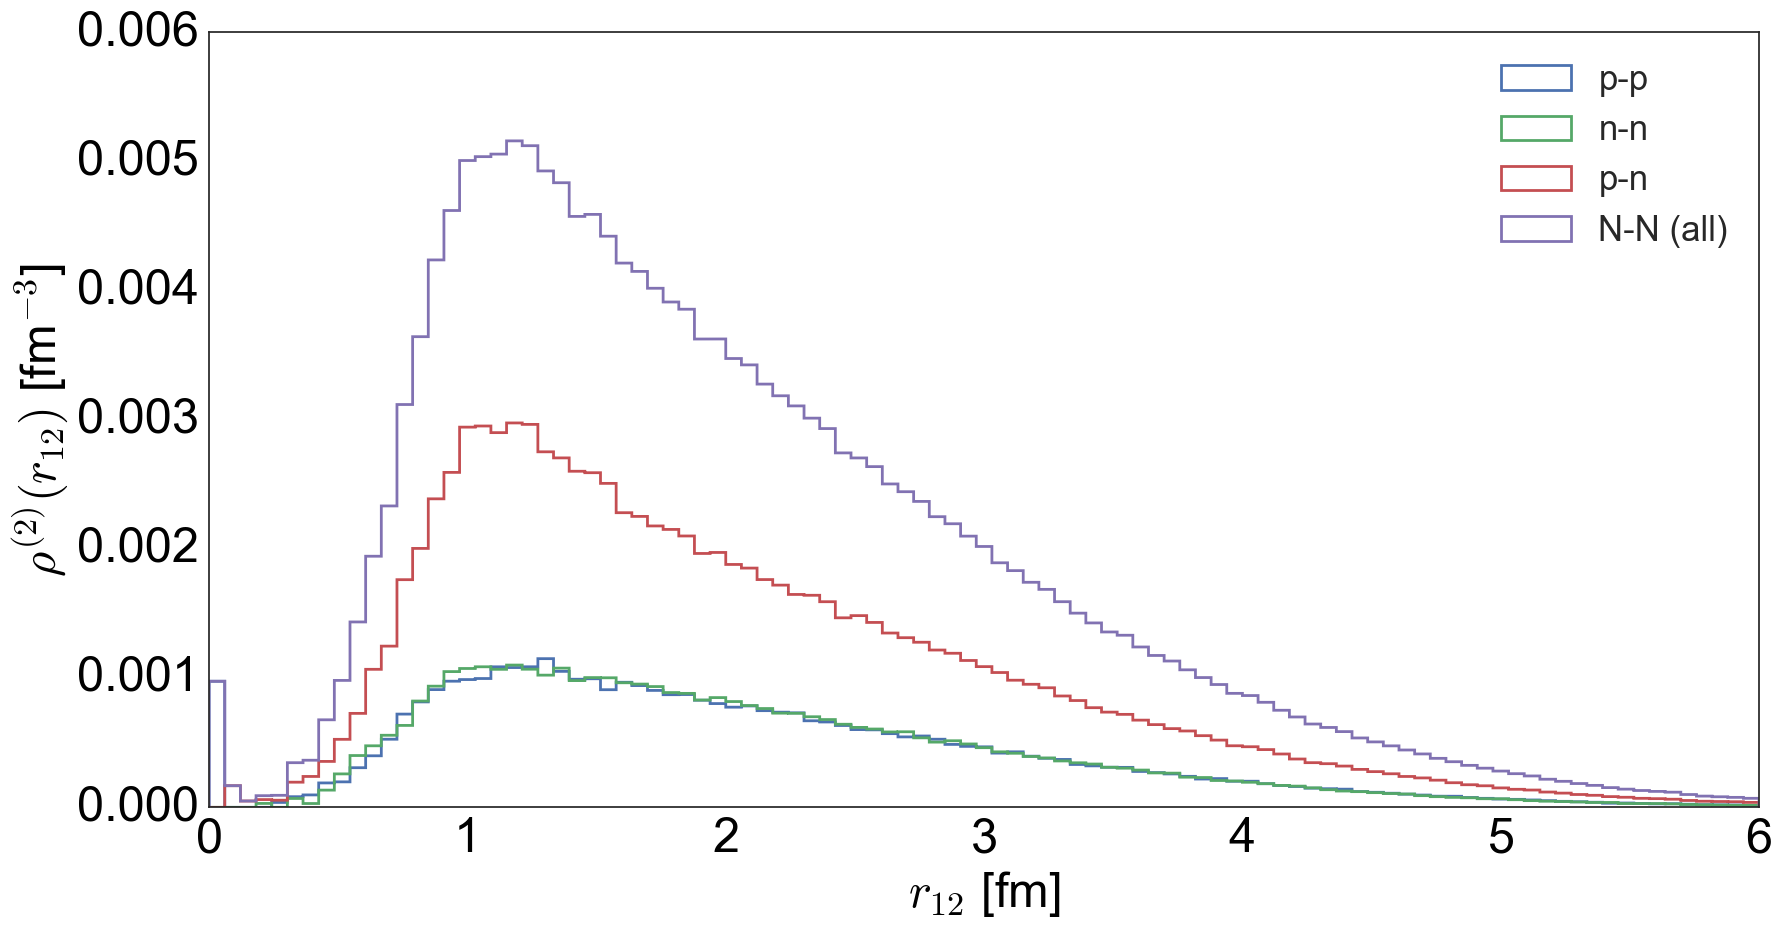

In [93]:
fig, ax = plt.subplots(figsize=(20,10))
# N = len(configurations)/float(len(configurations.groupby('nucleus_counter')))*Np
bins = np.linspace(0,6,100)
N = Np*len(configurations)/((Np+Nn)) 


hpp,bins,_ = plt.hist(pp_distances['r(pp)'] , weights=float(NppPairs)/(NNNPairs*len(pp_distances)*pp_distances['r(pp)']*pp_distances['r(pp)']) , bins=bins, histtype='step' , label='p-p',linewidth=2);
hnn,bins,_ = plt.hist(nn_distances['r(nn)'] , weights=float(NnnPairs)/(NNNPairs*len(nn_distances)*nn_distances['r(nn)']*nn_distances['r(nn)']) , bins=bins, histtype='step' , label='n-n',linewidth=2);
hnp,bins,_ = plt.hist(pn_distances['r(pn)'] , weights=float(NpnPairs)/(NNNPairs*len(pn_distances)*pn_distances['r(pn)']*pn_distances['r(pn)']) , bins=bins, histtype='step' , label='p-n',linewidth=2);
plt.hist(NN_distances['r(NN)'] , weights=float(NNNPairs)/(NNNPairs*len(NN_distances)*NN_distances['r(NN)']*NN_distances['r(NN)']) , bins=bins, histtype='step' , label='N-N (all)',linewidth=2);

set_axes(ax,'$r_{12}$ [fm]','$\\rho^{(2)} (r_{12})$ [fm$^{-3}$]',fontsize=35)
ax.set_xlim(0,6)
# ax.set_ylim(0,0.015)


plt.legend(fontsize=25)

In [92]:
integrand_pp = [4*3.1415*bins[i]*bins[i]*(bins[i+1]-bins[i])*hpp[i] for i in range(len(bins)-1)]
integral_pp = sum(integrand_pp)
print "integral(pp):",integral_pp
integrand_nn = [4*3.1415*bins[i]*bins[i]*(bins[i+1]-bins[i])*hnn[i] for i in range(len(bins)-1)]
integral_nn = sum(integrand_nn)
print "integral(nn):",integral_nn
integrand_pn = [4*3.1415*bins[i]*bins[i]*(bins[i+1]-bins[i])*hnp[i] for i in range(len(bins)-1)]
integral_pn = sum(integrand_pn)
print "integral(pn):",integral_pn
total = integral_pp + integral_nn + integral_pn
print 'pn/pp/nn ratios:',integral_pn/total,integral_pp/total,integral_nn/total

print 'nominal pn:',float(Np*Nn)/(Np*(Np-1)/2+Nn*(Nn-1)/2+Np*Nn)
print 'nominal nn:',float(Nn*(Nn-1))/2/(Np*(Np-1)/2+Nn*(Nn-1)/2+Np*Nn)
print 'nominal pp:',float(Np*(Np-1))/2/(Np*(Np-1)/2+Nn*(Nn-1)/2+Np*Nn)

integral(pp): 0.164640053912
integral(nn): 0.164850407728
integral(pn): 0.395477686516
pn/pp/nn ratios: 0.545510430385 0.227099706836 0.227389862779
nominal pn: 0.545454545455
nominal nn: 0.227272727273
nominal pp: 0.227272727273


In [4]:
def produce_cardiographic_plot( R = 2 , dR = 0.1 , frac = 0.01 , Np = 82 , Nn = 126 , do_print=False ):
    print 'producing data for cardiographic plot for %.2f < R < %.2f fm'%(R,R+dR)    
    sample_no , rho_p , rho_n , rho_N = [] , [] , [] , []
    print 'taking %.3f of the configurations'%frac
    i = 0
    dV = 4*np.pi*R*R*dR
#     N = frac*len(configurations)/float(dV*len(configurations.groupby('nucleus_counter')))
    N = frac*Np*len(configurations)/((Np+Nn)) 


    for nucleus in nuclei[0:int(frac*(len(nuclei)))]:
        Nucleons = nucleus[(R<nucleus.R) & (nucleus.R<R+dR)]
        Nprotons = len(Nucleons[Nucleons.type=='proton'])
        Nneutrons = len(Nucleons[Nucleons.type=='neutron'])
        NNucleons = len(Nucleons)
        sample_no.append(i)
        rho_p.append(float(Nprotons)/(dV))
        rho_n.append(float(Nneutrons)/(dV))
        rho_N.append(float(NNucleons)/(dV))
        if (i%100)==0: 
            print 'nucleus:',i
            if do_print:
                print 'rho_p:',rho_p[-1]
                print 'rho_n:',rho_n[-1]
                print 'rho:',rho_N[-1]
                print 'NNucleons:',NNucleons
        i = i+1
    density = pd.DataFrame( {'Sample No.':sample_no , 'rho_p':rho_p , 'rho_n':rho_n , 'rho_N':rho_N} )
    filename=anafiles_dir + '/%s_density_%.1f_fm.csv'%(configurations_name,R)
    density.to_csv(filename)
    print 'done, saved to %s'%filename
    return density 

In [107]:
density_05fm = produce_cardiographic_plot( R = 0.5 , dR = 0.2 , frac = 1 , Nn=Nn , Np=Np )
density_1fm = produce_cardiographic_plot( R = 1 , dR = 0.2 , frac = 1 , Nn=Nn , Np=Np )
density_15fm = produce_cardiographic_plot( R = 1.5 , dR = 0.2 , frac = 1 , Nn=Nn , Np=Np )
density_2fm = produce_cardiographic_plot( R = 2 , dR = 0.2 , frac = 1 , Nn=Nn , Np=Np )
density_25fm = produce_cardiographic_plot( R = 2.5 , dR = 0.2 , frac = 1 , Nn=Nn , Np=Np )
density_3fm = produce_cardiographic_plot( R = 3 , dR = 0.2 , frac = 1 , Nn=Nn , Np=Np )
density_4fm = produce_cardiographic_plot( R = 4 , dR = 0.2 , frac = 1 , Nn=Nn , Np=Np )
density_5fm = produce_cardiographic_plot( R = 5 , dR = 0.2 , frac = 1 , Nn=Nn , Np=Np )
# density_6fm = produce_cardiographic_plot( R = 6 , dR = 0.2 , frac = 1 , Nn=Nn , Np=Np )
# density_7fm = produce_cardiographic_plot( R = 7 , dR = 0.2 , frac = 1 , Nn=Nn , Np=Np )
# density_8fm = produce_cardiographic_plot( R = 8 , dR = 0.2 , frac = 1 , Nn=Nn , Np=Np )

producing data for cardiographic plot for 0.50 < R < 0.70 fm
taking 1.000 of the configurations
nucleus: 0
nucleus: 100
nucleus: 200
nucleus: 300
nucleus: 400
nucleus: 500
nucleus: 600
nucleus: 700
nucleus: 800
nucleus: 900
nucleus: 1000
nucleus: 1100
nucleus: 1200
nucleus: 1300
nucleus: 1400
nucleus: 1500
nucleus: 1600
nucleus: 1700
nucleus: 1800
nucleus: 1900
nucleus: 2000
nucleus: 2100
nucleus: 2200
nucleus: 2300
nucleus: 2400
nucleus: 2500
nucleus: 2600
nucleus: 2700
nucleus: 2800
nucleus: 2900
nucleus: 3000
nucleus: 3100
nucleus: 3200
nucleus: 3300
nucleus: 3400
nucleus: 3500
nucleus: 3600
nucleus: 3700
nucleus: 3800
nucleus: 3900
nucleus: 4000
nucleus: 4100
nucleus: 4200
nucleus: 4300
nucleus: 4400
nucleus: 4500
nucleus: 4600
nucleus: 4700
nucleus: 4800
nucleus: 4900
nucleus: 5000
nucleus: 5100
nucleus: 5200
nucleus: 5300
nucleus: 5400
nucleus: 5500
nucleus: 5600
nucleus: 5700
nucleus: 5800
nucleus: 5900
nucleus: 6000
nucleus: 6100
nucleus: 6200
nucleus: 6300
nucleus: 6400
nucleu

In [9]:
density_list , density = os.listdir(anafiles_dir) , [] 
i=0
for file in density_list:                                                                                        
    print 'density[%d'%i + ']=',file
    density.append(pd.read_csv(anafiles_dir+"/"+file))
    i += 1


density[0]= c12-ico6-10k_rd200_density_0.5_fm.csv
density[1]= c12-ico6-10k_rd200_density_1.0_fm.csv
density[2]= c12-ico6-10k_rd200_density_1.5_fm.csv
density[3]= c12-ico6-10k_rd200_density_2.0_fm.csv
density[4]= c12-ico6-10k_rd200_density_2.5_fm.csv
density[5]= c12-ico6-10k_rd200_density_3.0_fm.csv
density[6]= c12-ico6-10k_rd200_density_4.0_fm.csv
density[7]= c12-ico6-10k_rd200_density_5.0_fm.csv
density[8]= c12-ico6-10k_rd200_density_6.0_fm.csv
density[9]= c12-ico6-10k_rd200_density_7.0_fm.csv
density[10]= c12-ico6-10k_rd200_density_8.0_fm.csv
density[11]= pb208-ico0-skin-10k_density_2fm.csv
density[12]= pb208-ico0-skin-10k_density_4fm.csv
density[13]= pb208-ico0-skin-10k_density_6fm.csv
density[14]= pb208-ico0-skin-10k_density_8fm.csv
density[15]= Pb208-ico3-skin-10k.csv
density[16]= pb208-ico3-skin-10k_density_1fm.csv
density[17]= pb208-ico3-skin-10k_density_2fm.csv
density[18]= pb208-ico3-skin-10k_density_3fm.csv
density[19]= pb208-ico3-skin-10k_density_4fm.csv
density[20]= pb208-i


tab completion not implemented for this context

tab completion not implemented for this context


In [25]:
def plot_density_in_R(density , R=2 , dR=0.2 , ylim=None , iStart=0 , NMax=15 , x_text=5 , do_legend=False):
    fig,ax=plt.subplots(figsize=(20,10))
    plt.plot(density['Sample No.'][iStart:(iStart+NMax)],density.rho_p[iStart:(iStart+NMax)],label='$protons$')
    avg_rho_p = np.average(density.rho_p[iStart:(iStart+NMax)])
    plt.plot(density['Sample No.'][iStart:(iStart+NMax)],avg_rho_p*np.ones(NMax),'b--')

    plt.plot(density['Sample No.'][iStart:(iStart+NMax)],density.rho_n[iStart:(iStart+NMax)],label='$neutrons$')
    avg_rho_n = np.average(density.rho_n[iStart:(iStart+NMax)])
    plt.plot(density['Sample No.'][iStart:(iStart+NMax)],avg_rho_n*np.ones(NMax),'g--')

    plt.plot(density['Sample No.'][iStart:(iStart+NMax)],density.rho_N[iStart:(iStart+NMax)],label='$all$')
    avg_rho = np.average(density.rho_N[iStart:(iStart+NMax)])
    plt.plot(density['Sample No.'][iStart:(iStart+NMax)],avg_rho*np.ones(NMax),'r--')
    
    if do_legend: 
        plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
    if ylim is None:
        ymax = np.max(density.rho_N[iStart:(iStart+NMax)])
        ax.set_ylim(-0.1,1.1*ymax)
        
        plt.text(x_text,0.9*ymax,'$\\rho_{avg.}$=%.3f'%avg_rho,fontsize=23 , color='r')

    ax.set_xlabel('configuration')
    ax.set_ylabel('$\\rho^{(1)} (R)$ [fm$^{-3}$]')
    ax.set_title('%.1f < R < %.1f+%.1f fm'%(R,R,dR))

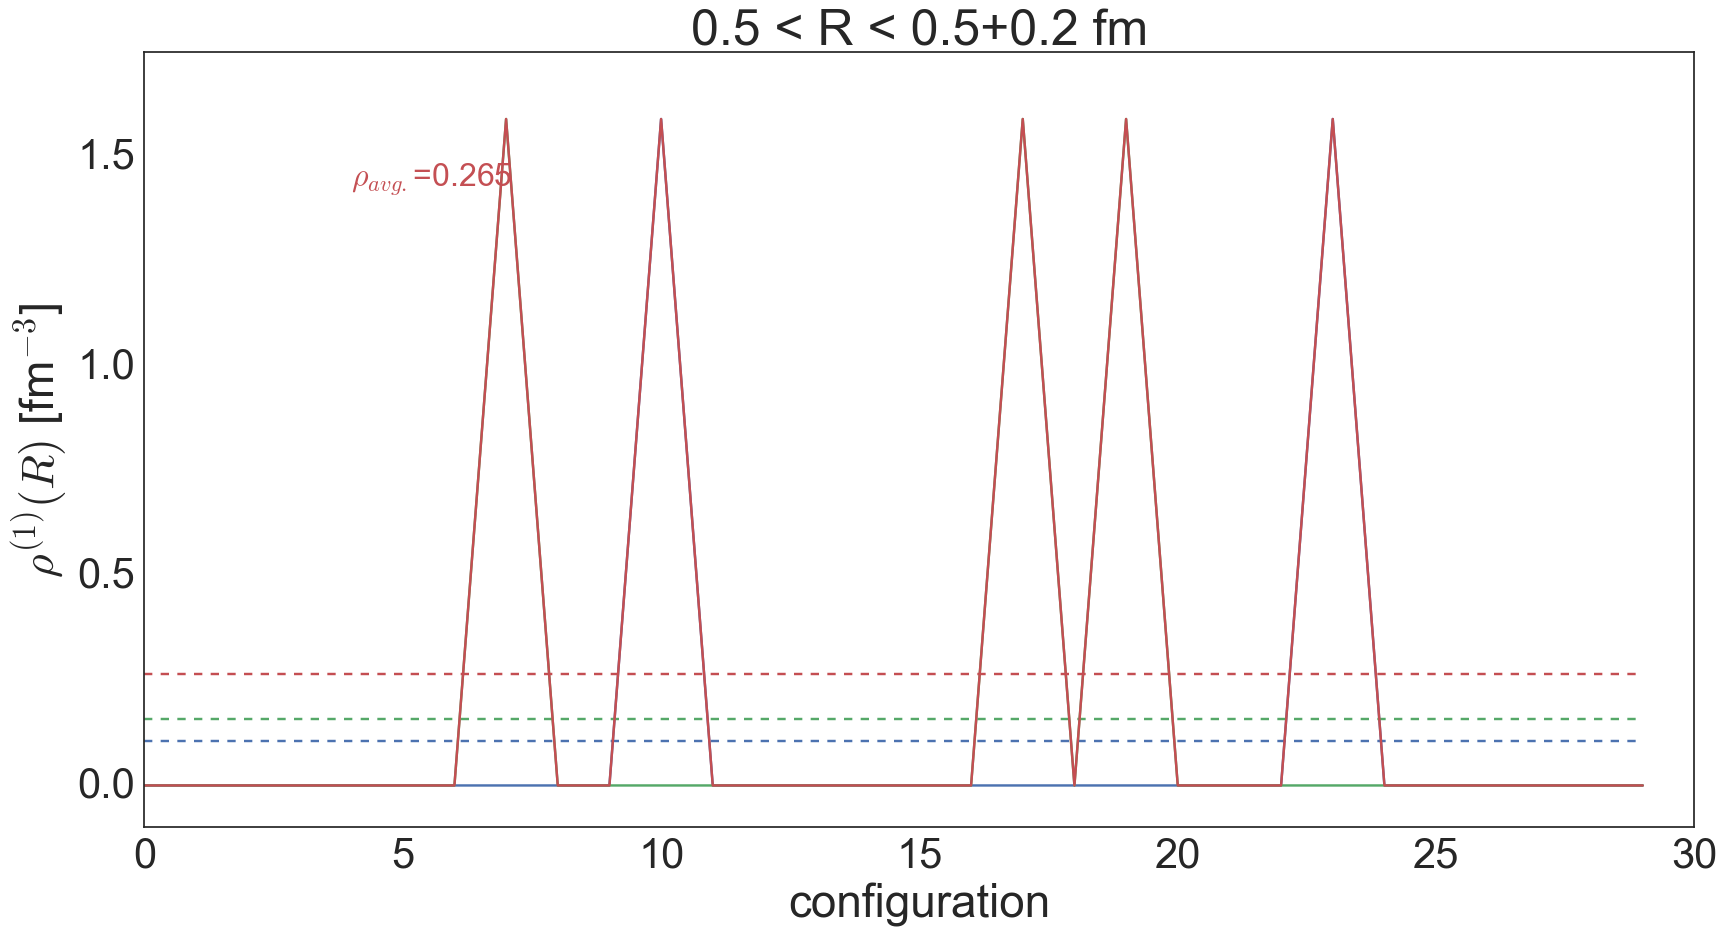

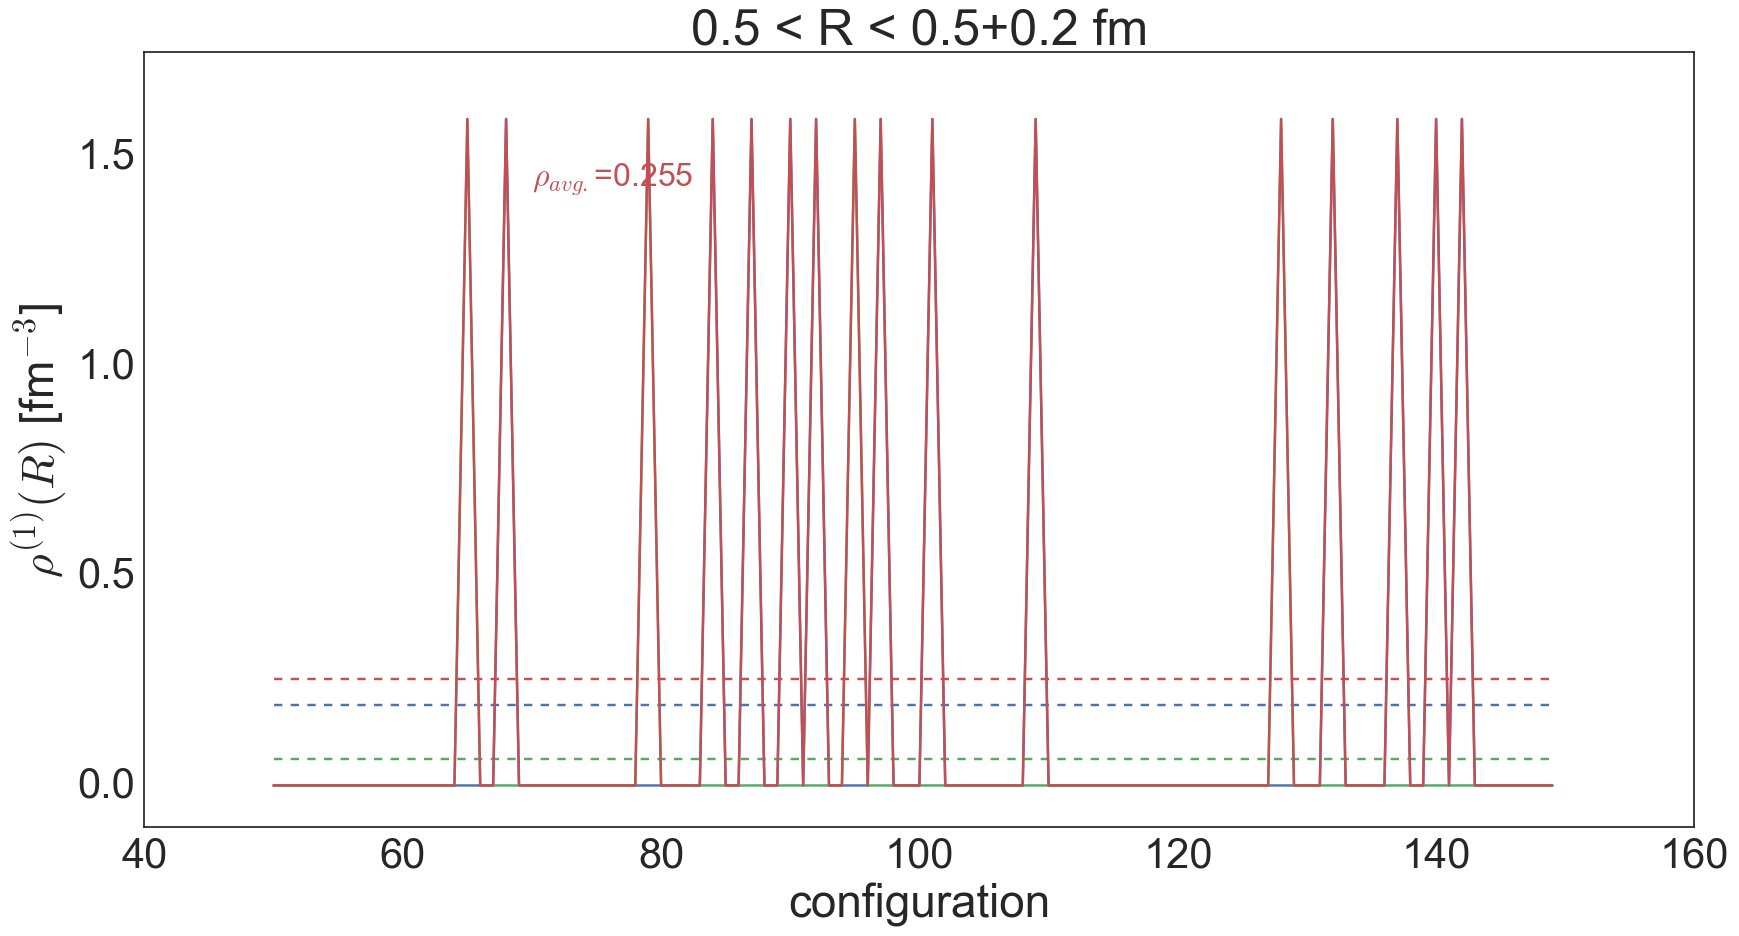

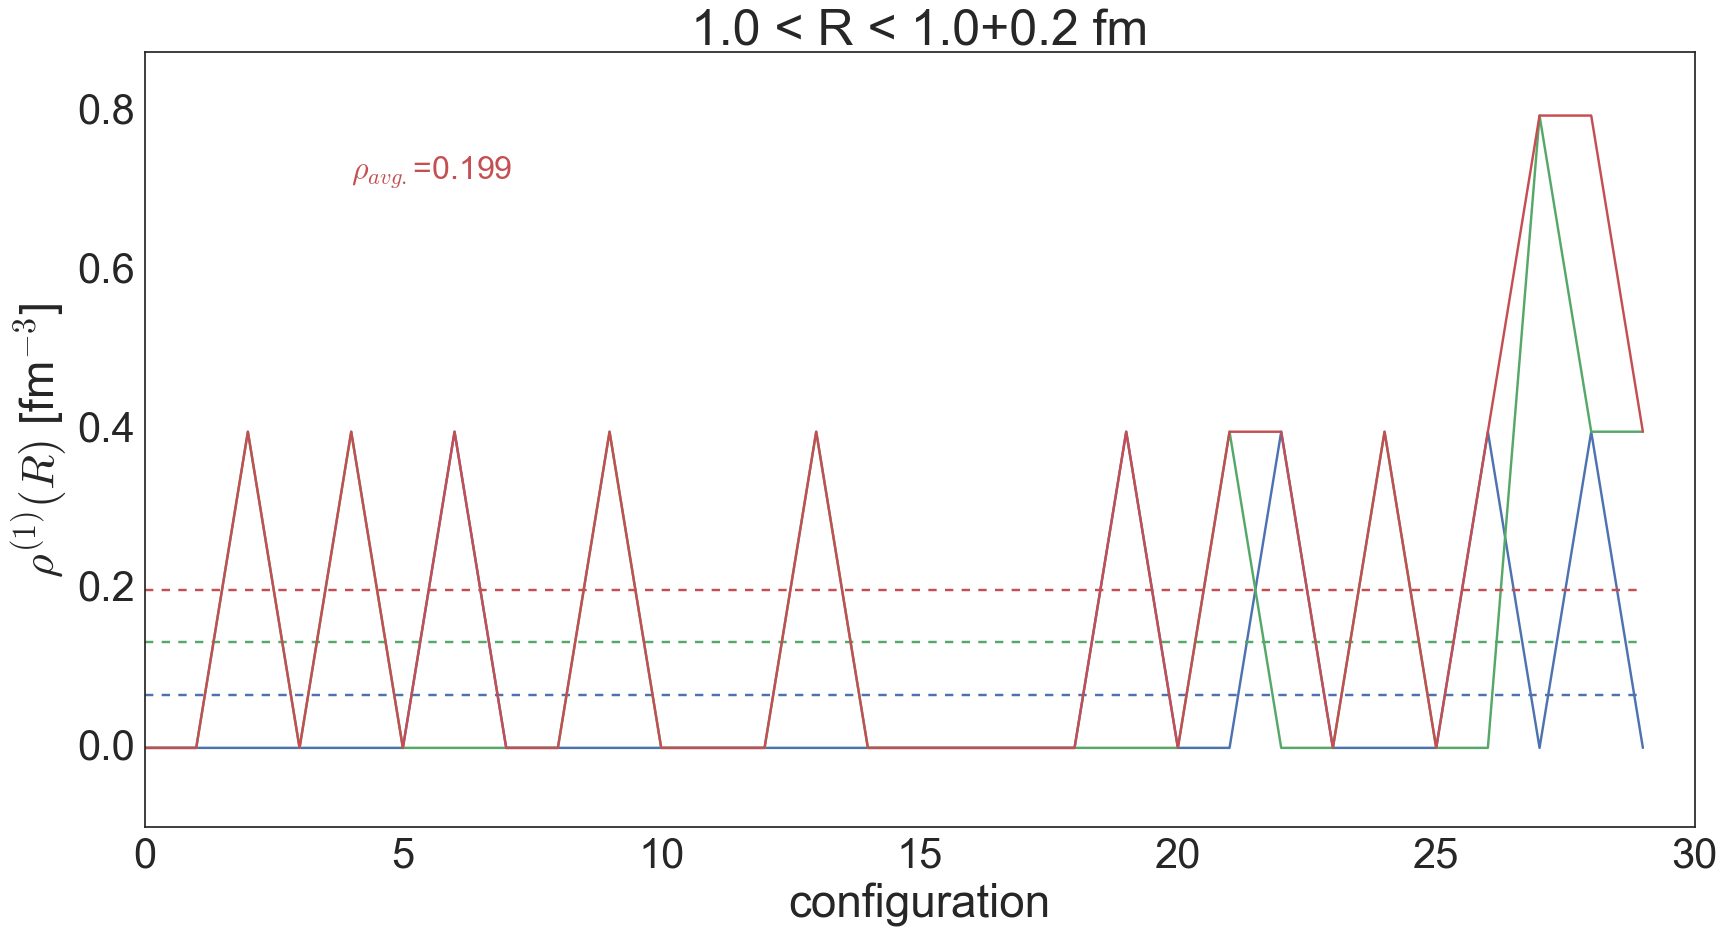

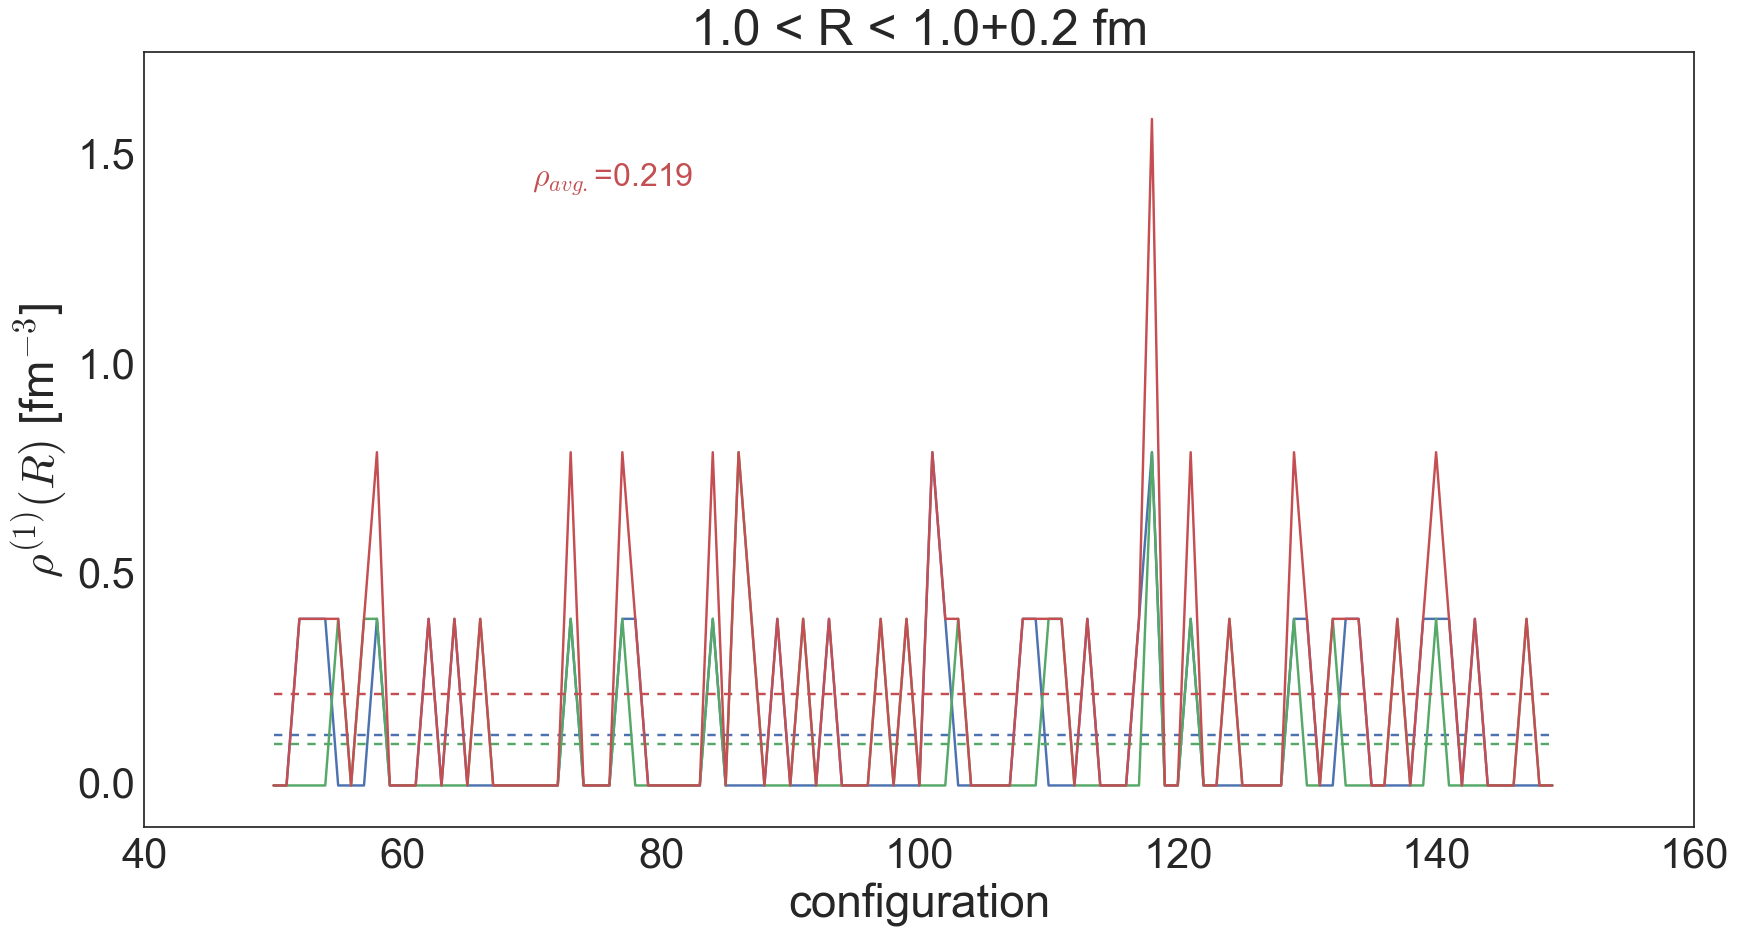

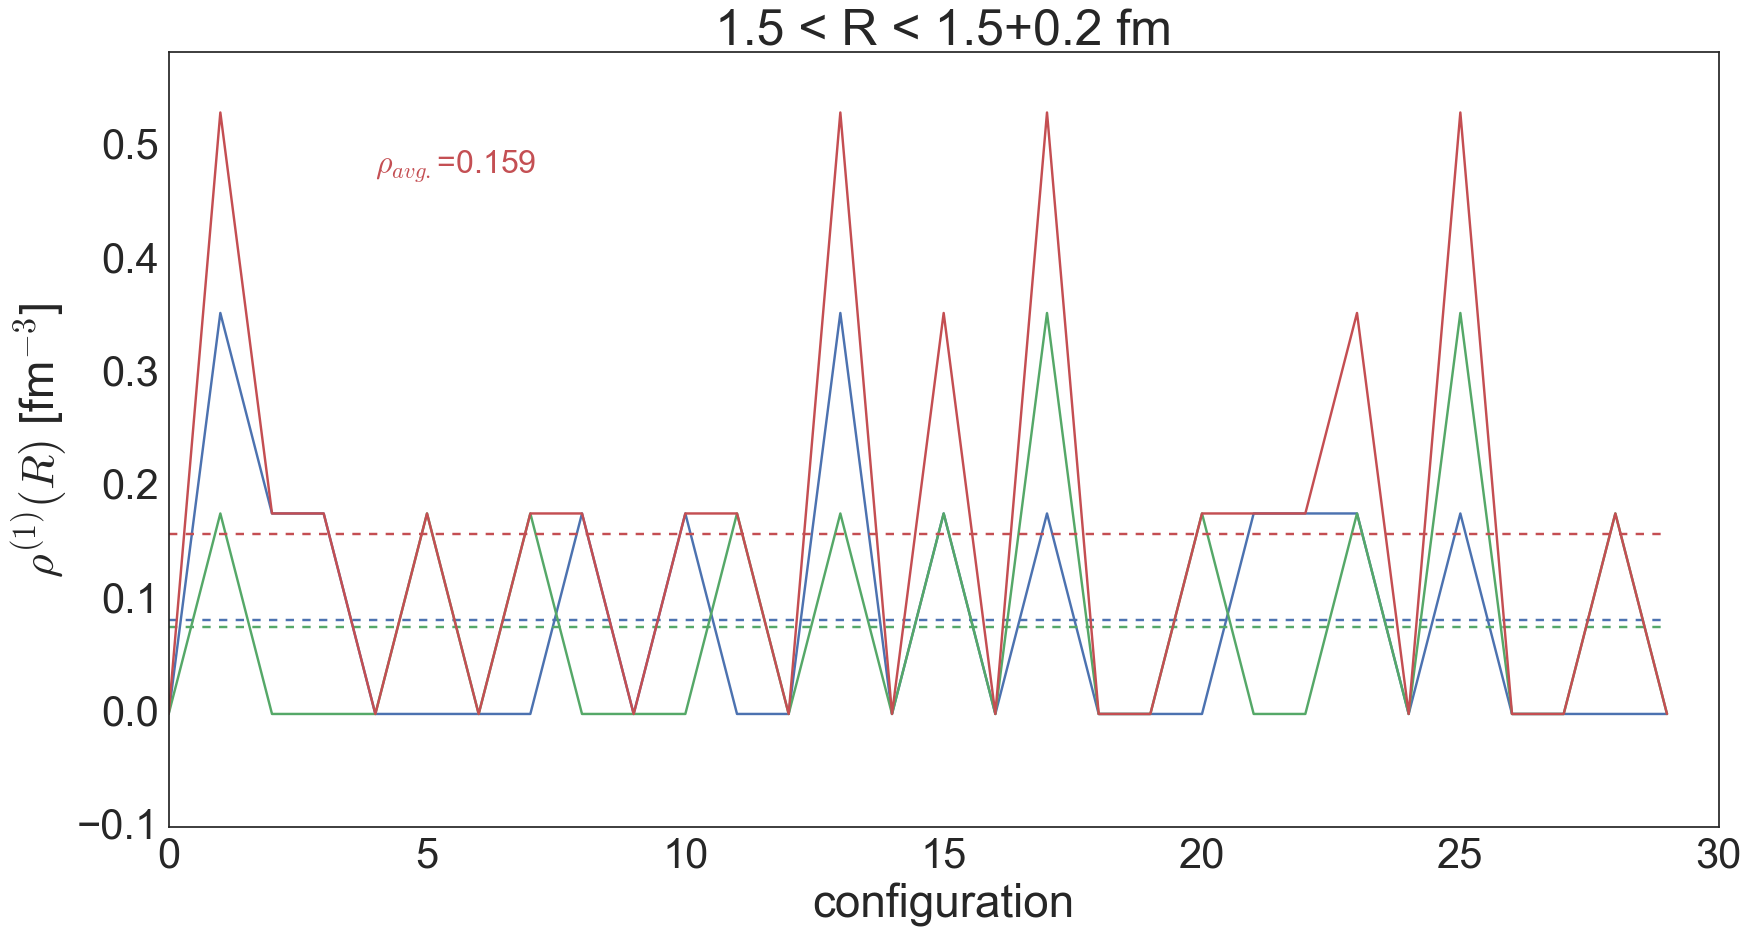

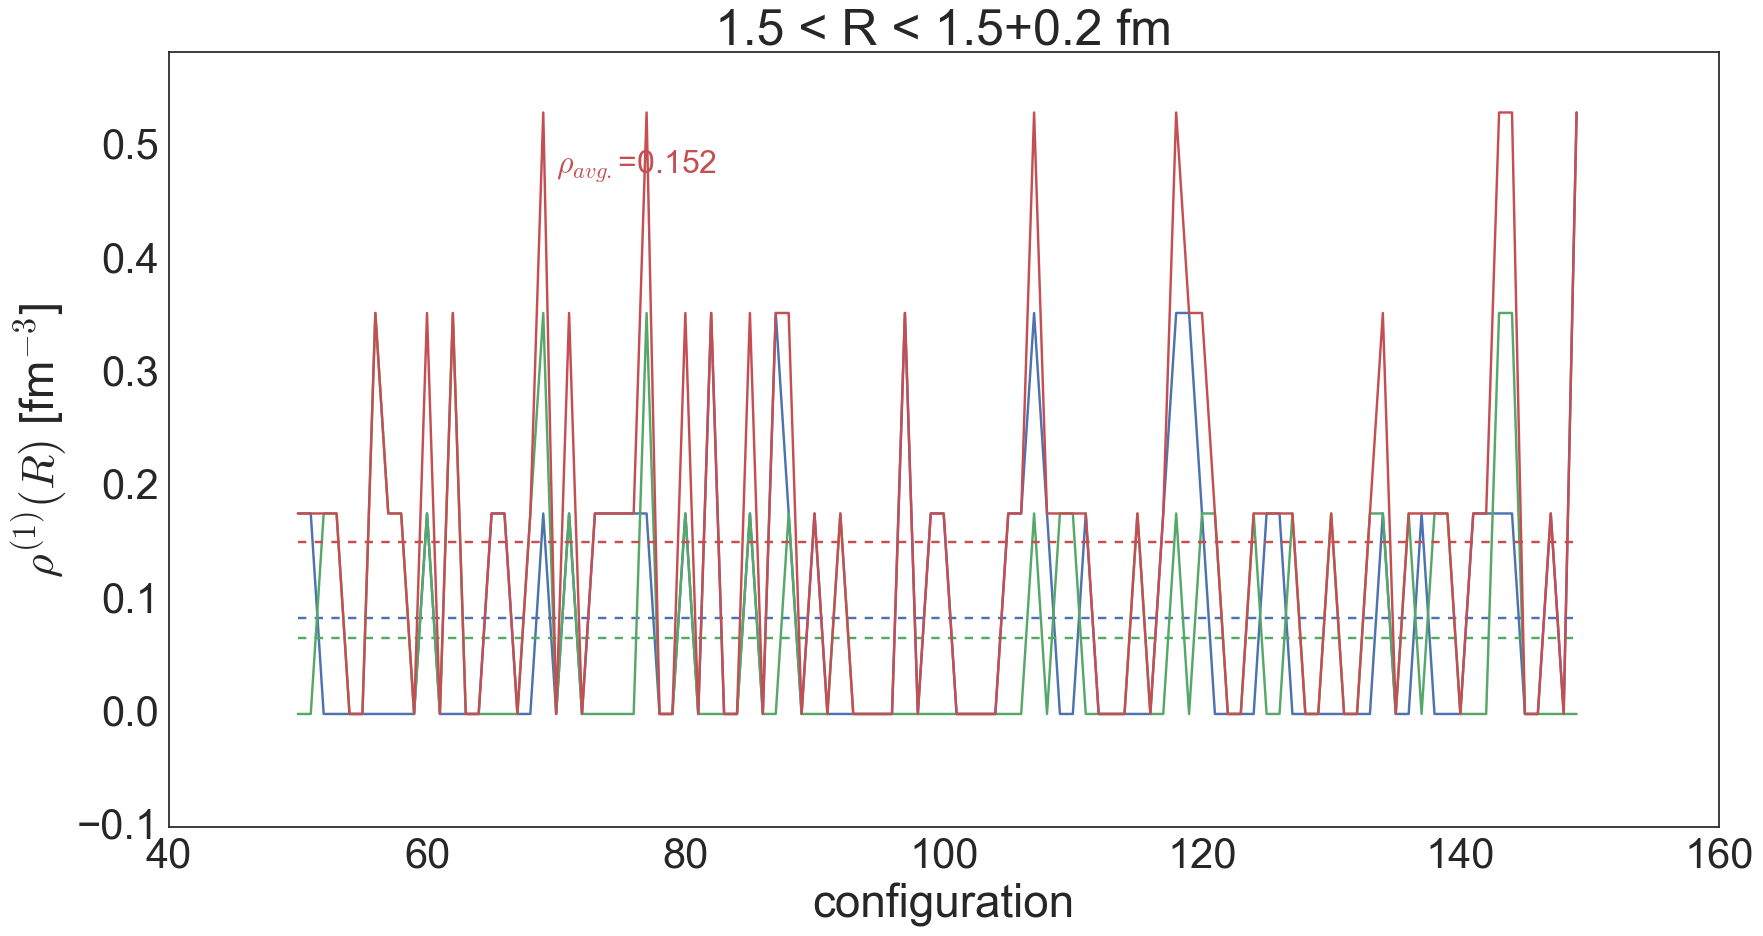

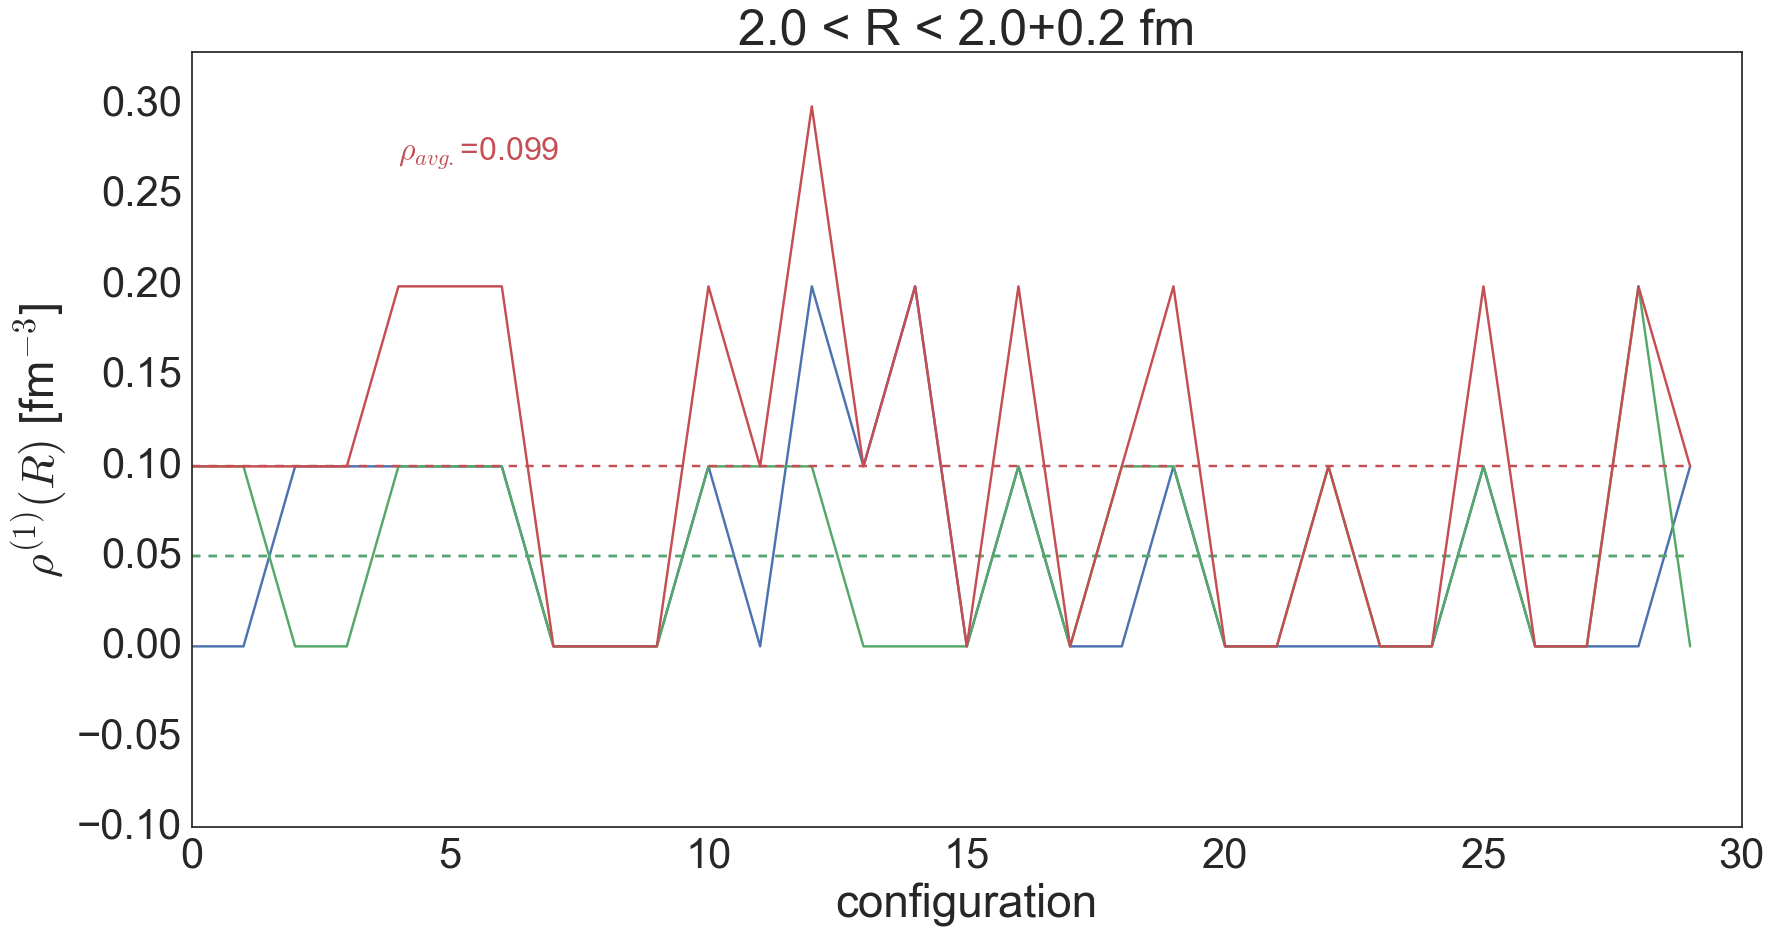

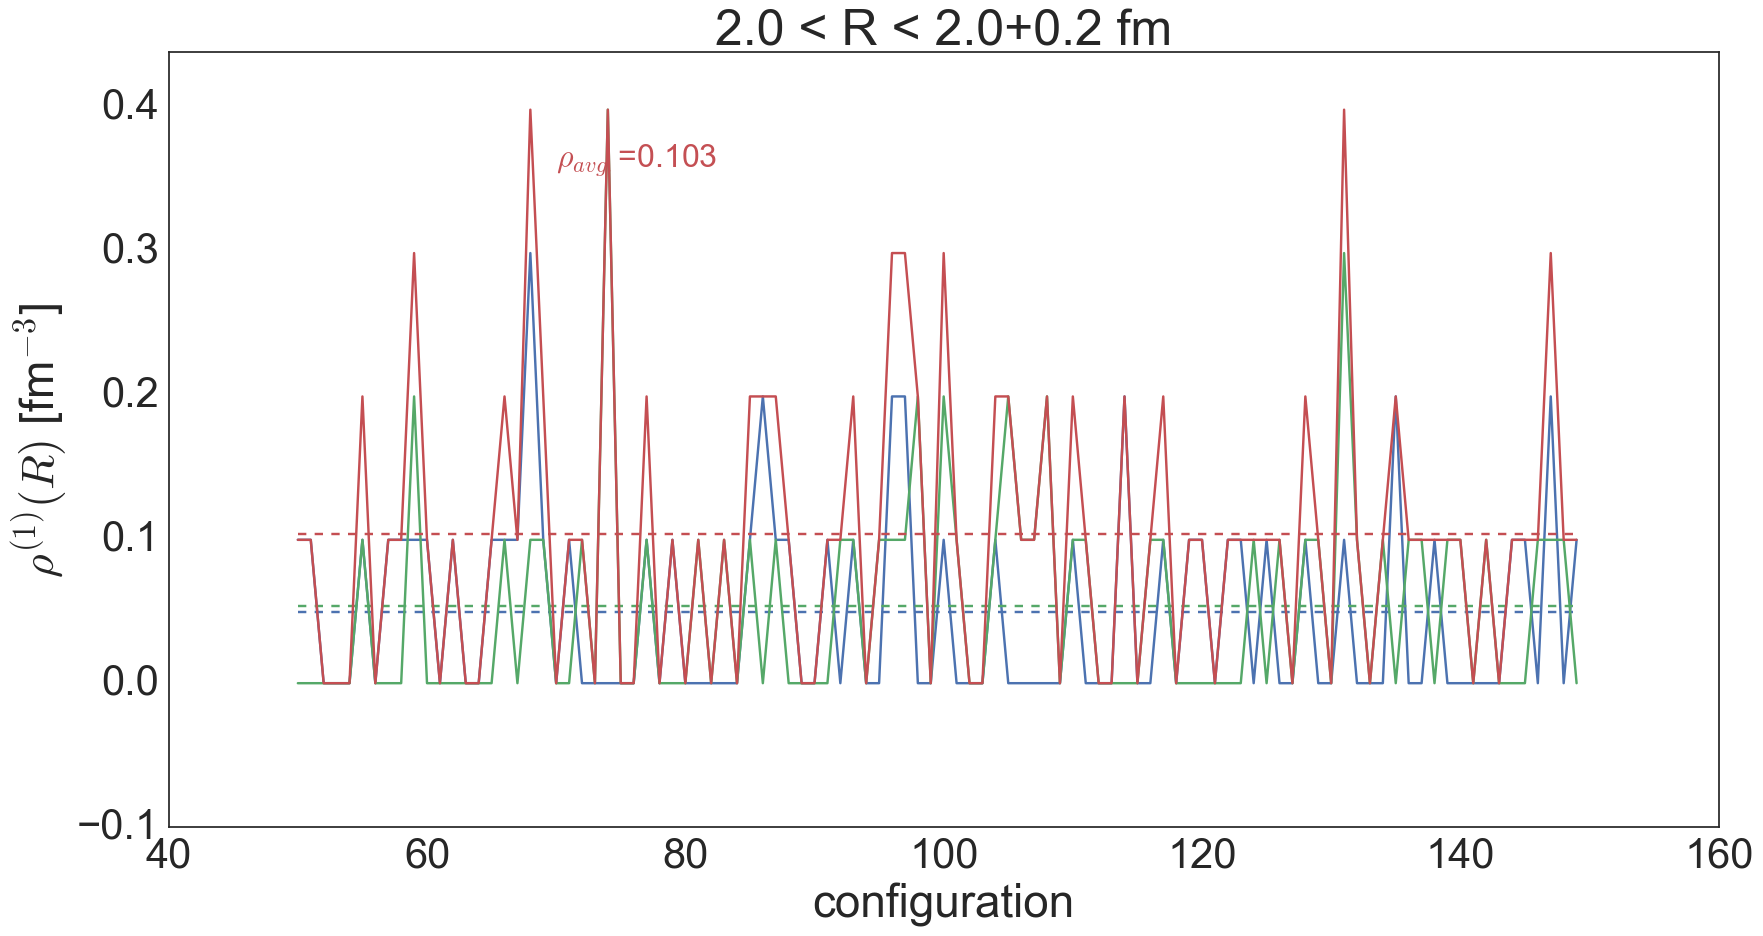

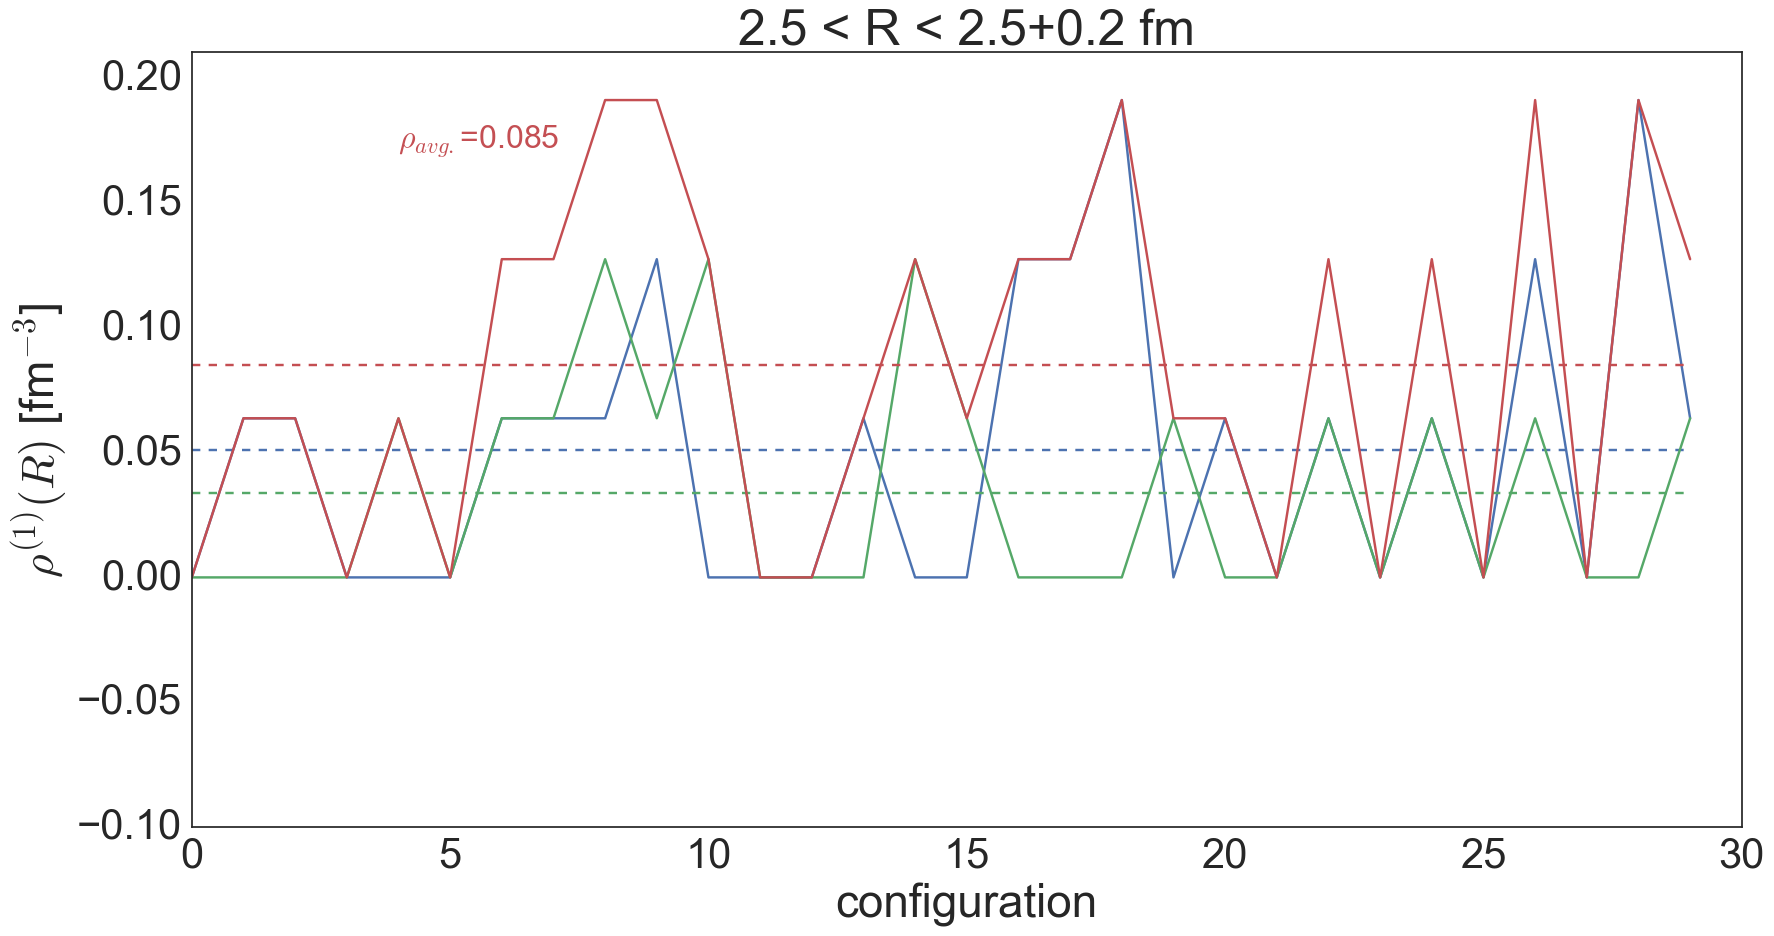

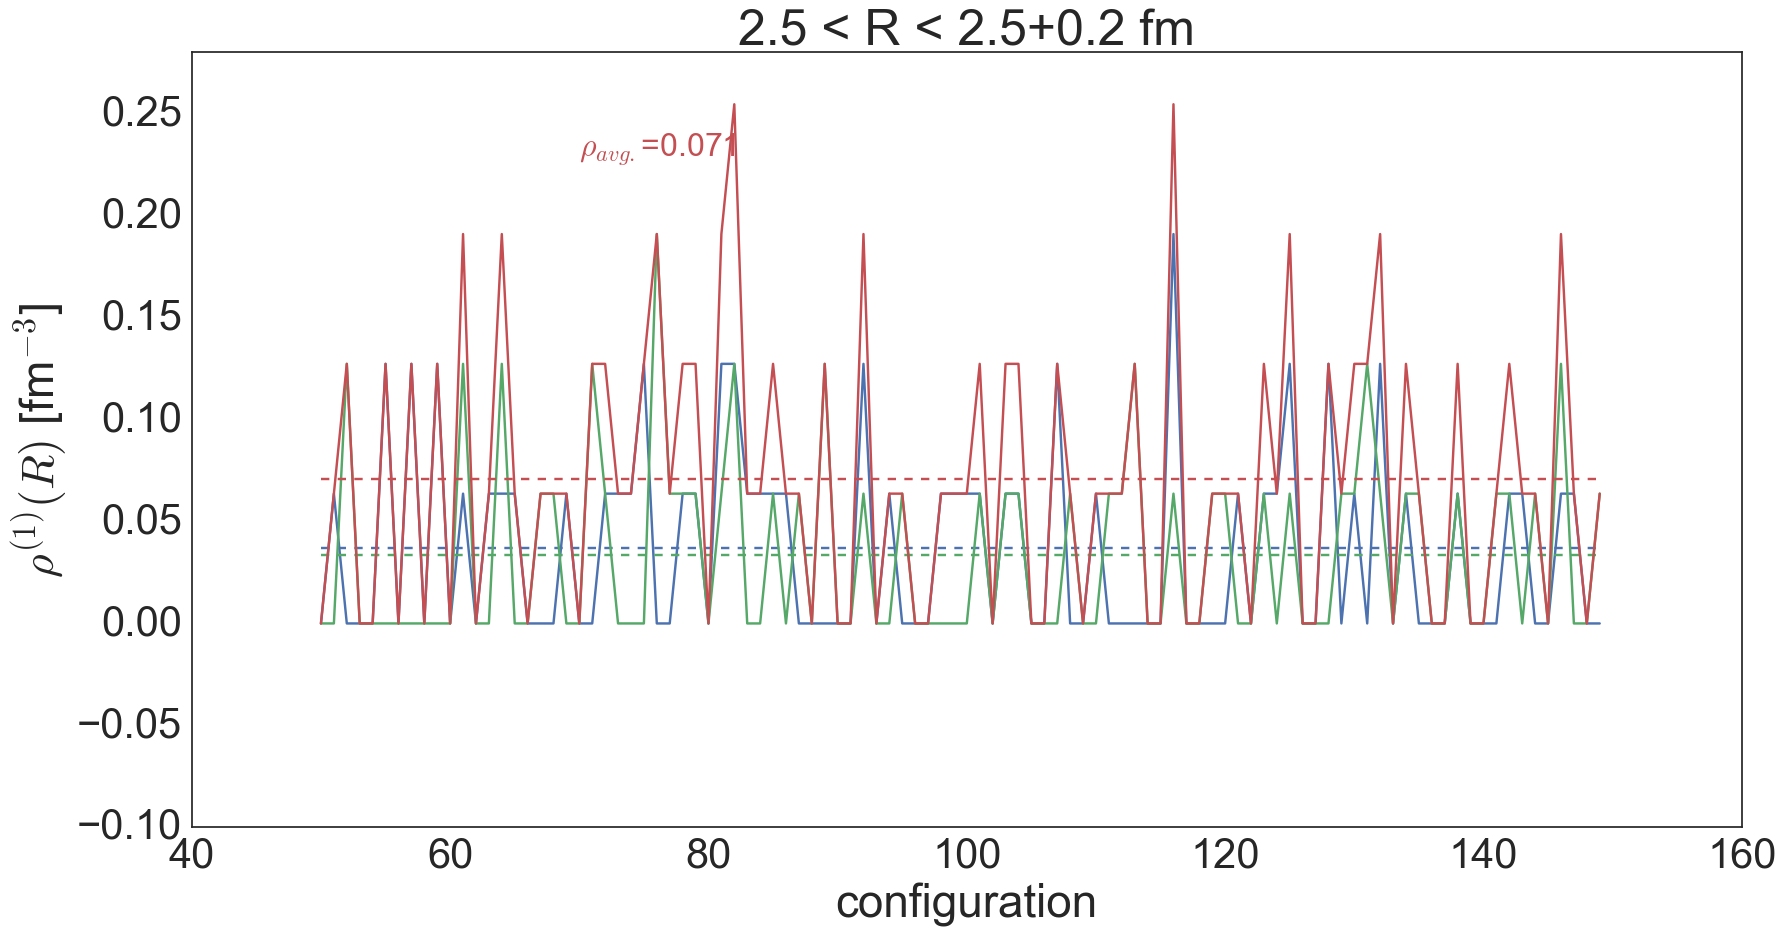

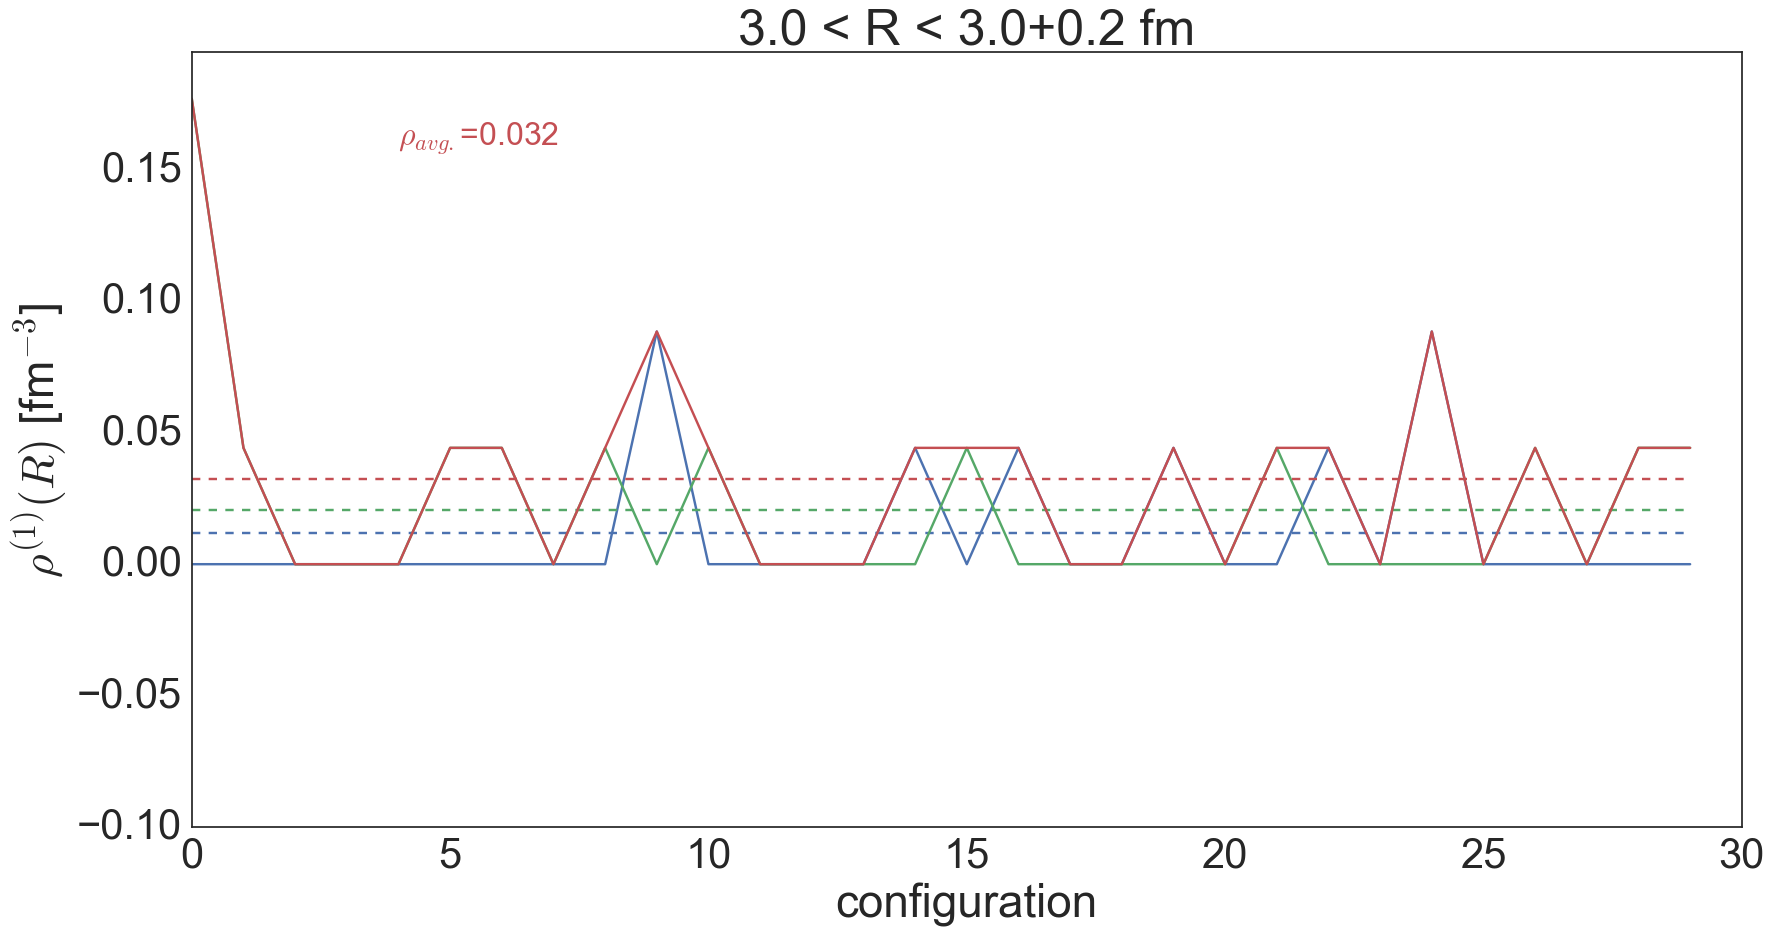

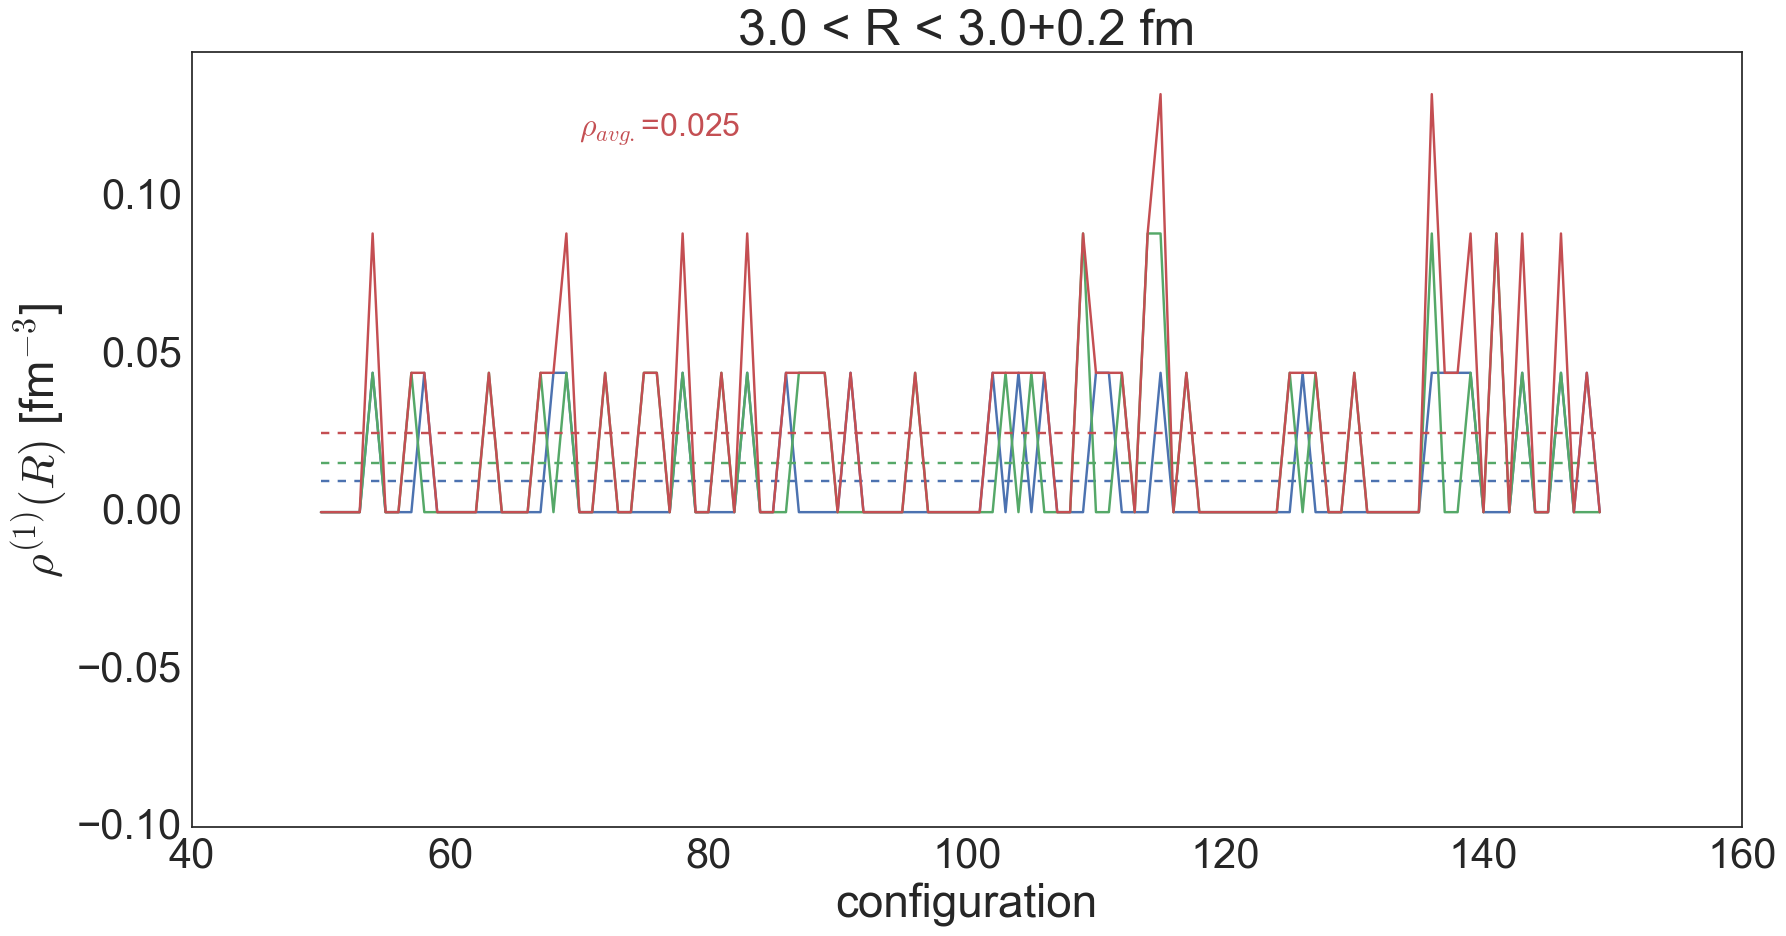

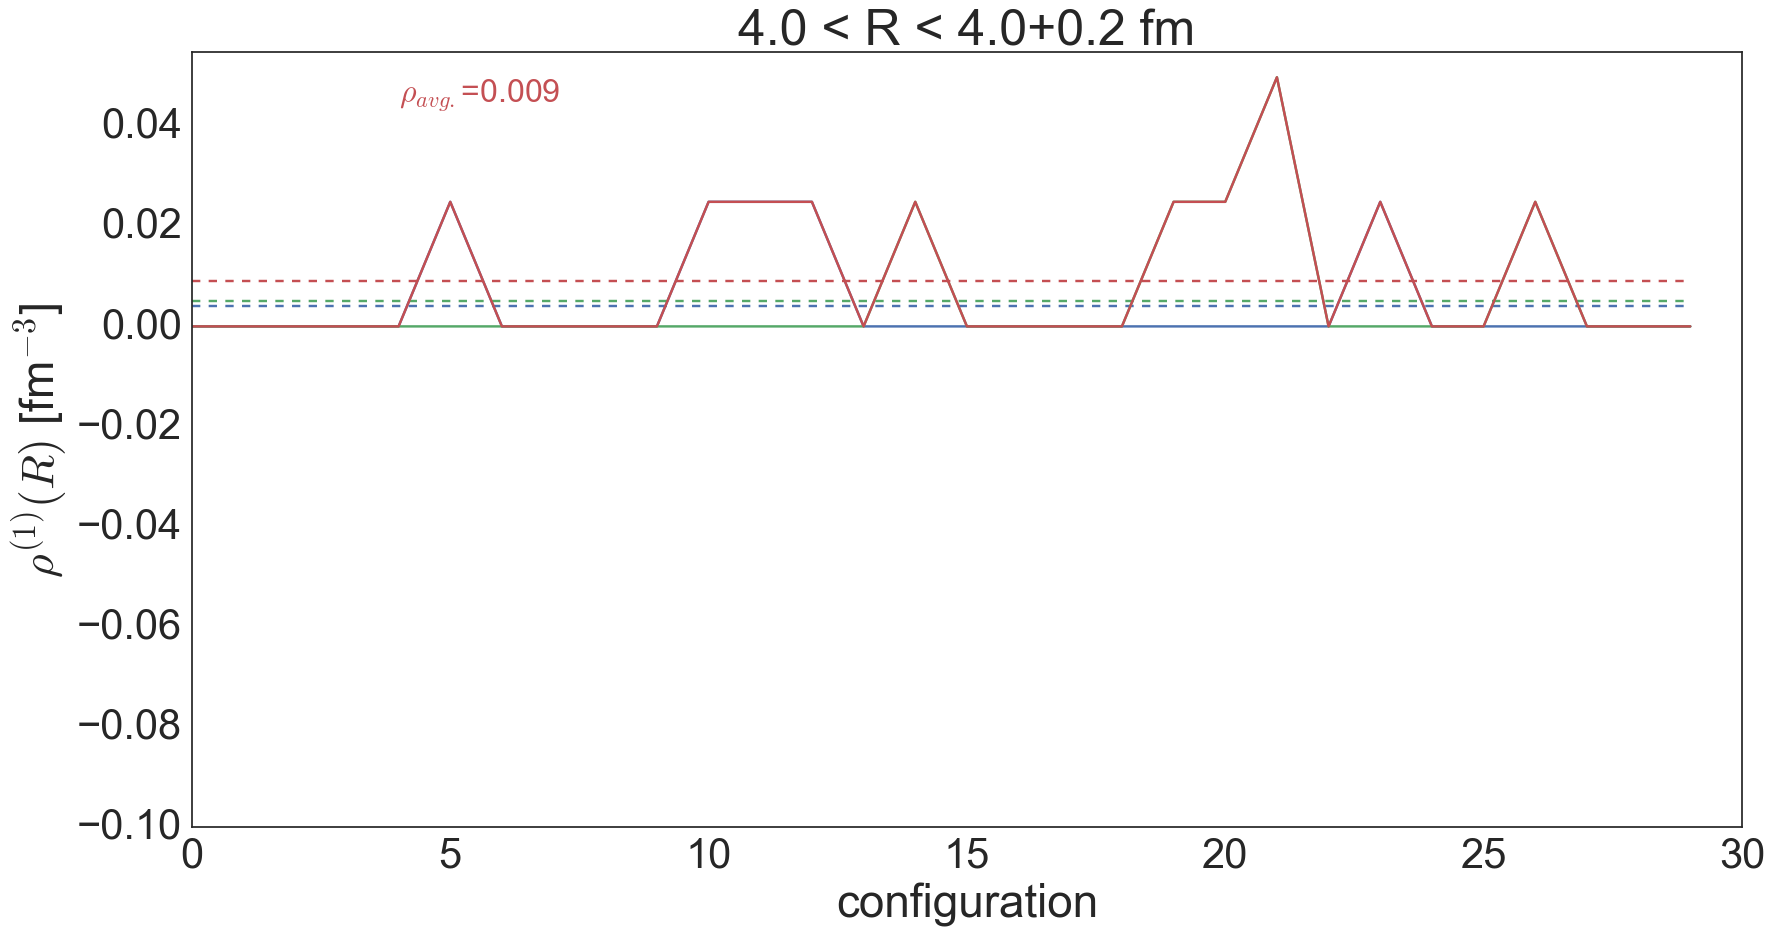

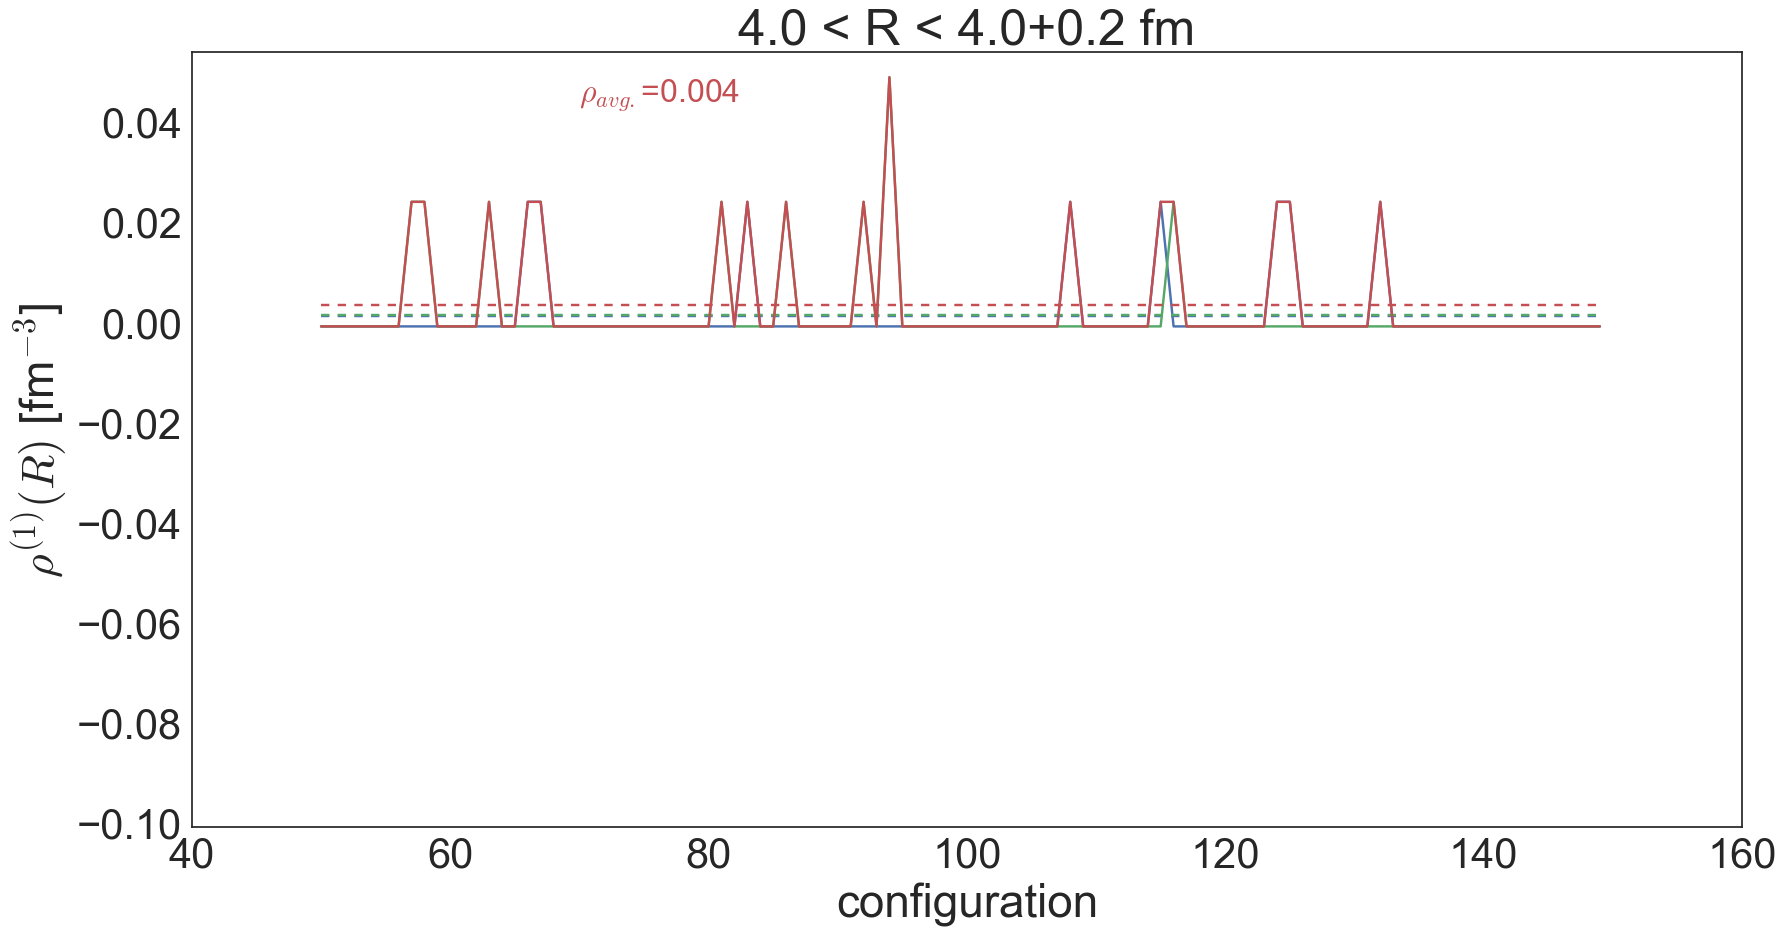

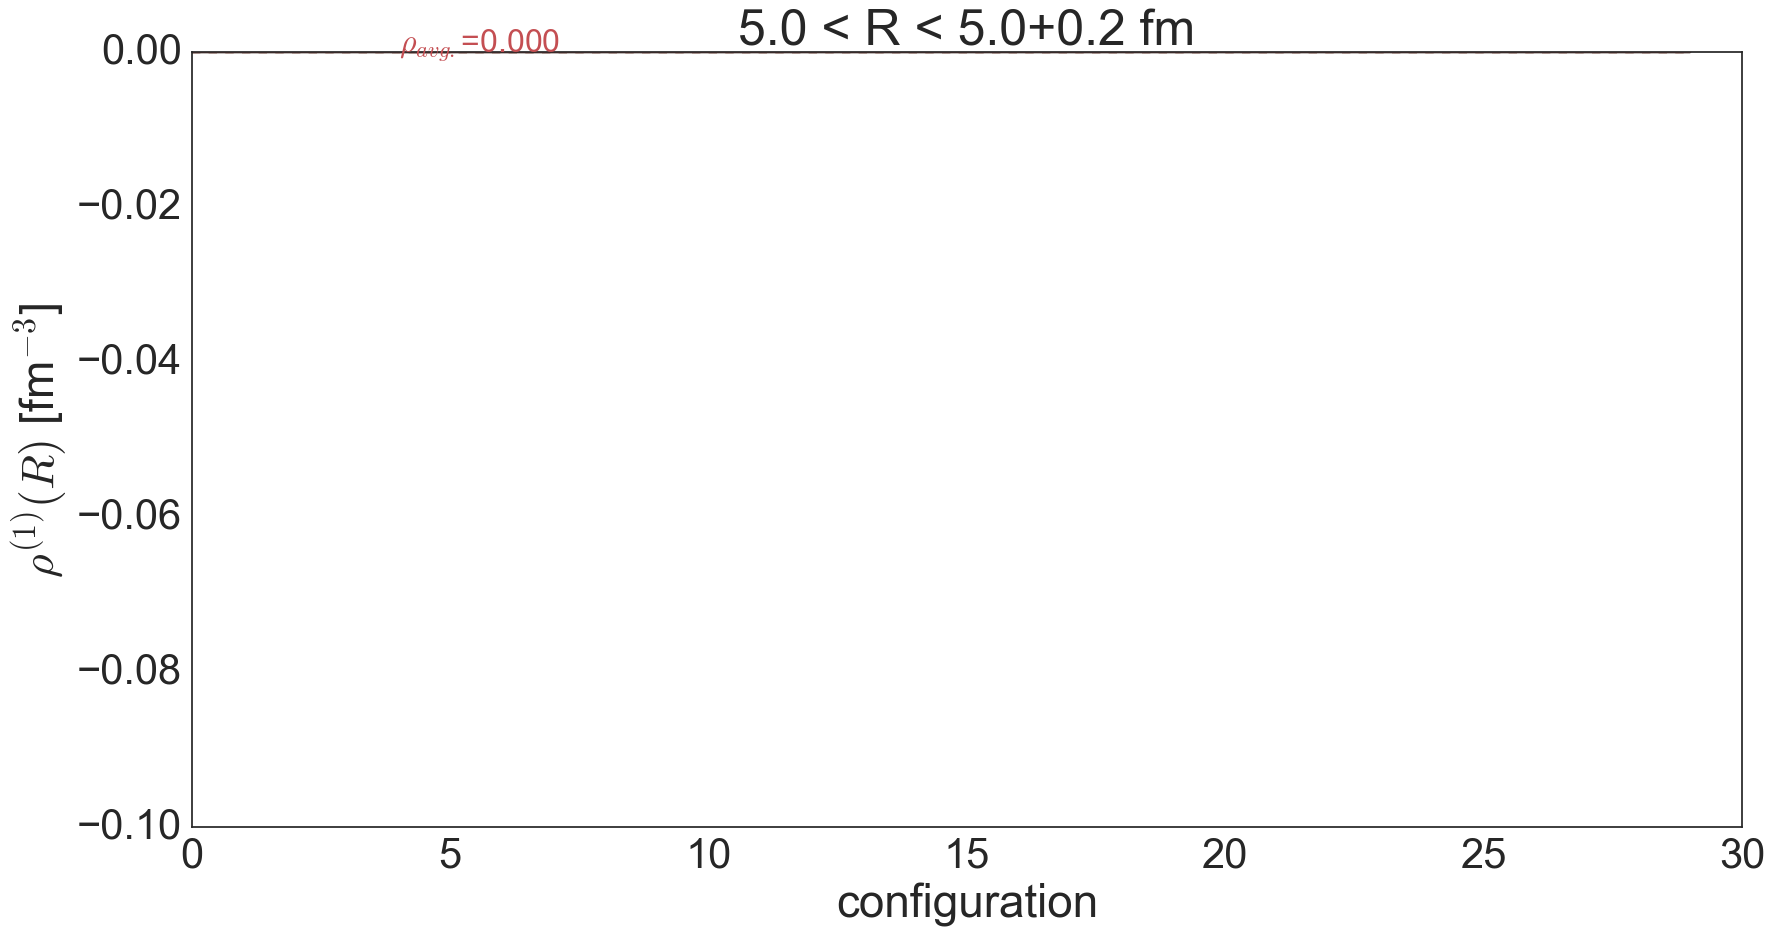

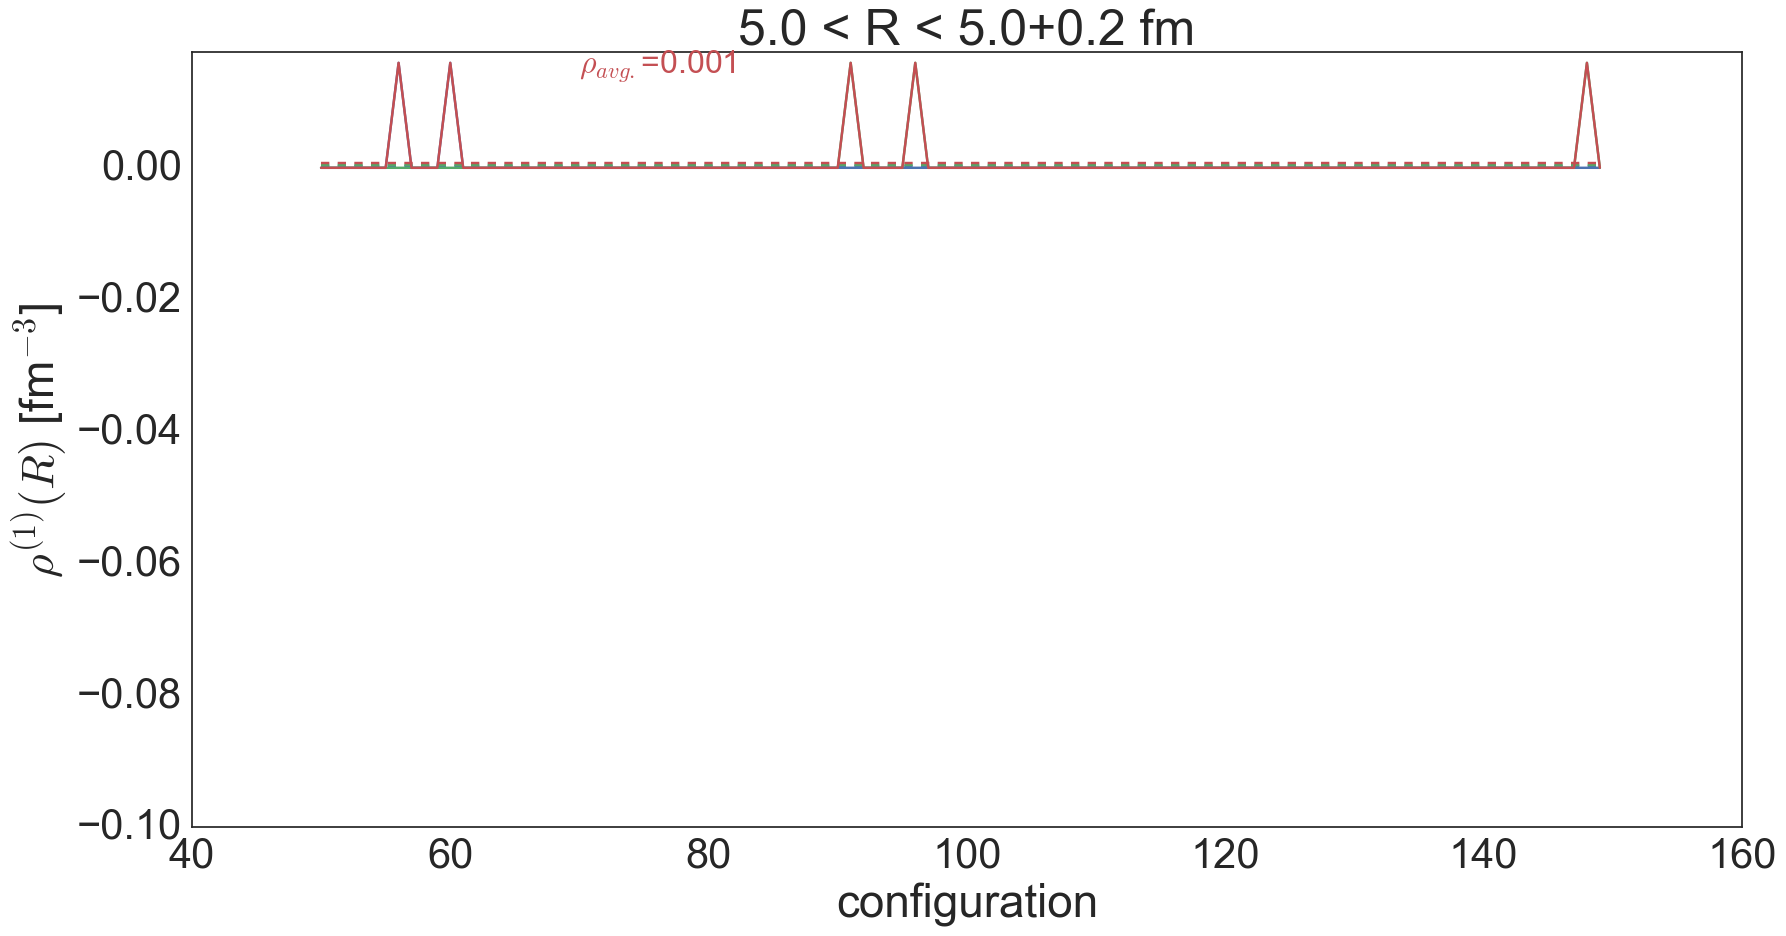

In [27]:
Rs = [0.5 , 1.0 , 1.5 , 2.0 , 2.5 , 3.0 , 4.0 , 5.0 ]
for i,R in zip(range(len(density)),Rs):
    plot_density_in_R(density[i] , R=R , dR=0.2  , iStart=0 , NMax=30 ,x_text=4) # , ylim=(-0.01,0.8)
    plot_density_in_R(density[i] , R=R , dR=0.2  , iStart=50 , NMax=100 ,x_text=70) 

In [28]:
plot_density_in_R(density_05fm , R=0.5 , dR=0.2 , ylim=(-0.01,0.8) , iStart=0 , NMax=30 ,x_text=4)
plot_density_in_R(density_15fm , R=1.5 , dR=0.2 , ylim=(-0.01,0.8) , iStart=0 , NMax=30 ,x_text=4)
plot_density_in_R(density_25fm , R=2.5 , dR=0.2 , ylim=(-0.01,0.8) , iStart=0 , NMax=30 ,x_text=4)

NameError: name 'density_05fm' is not defined

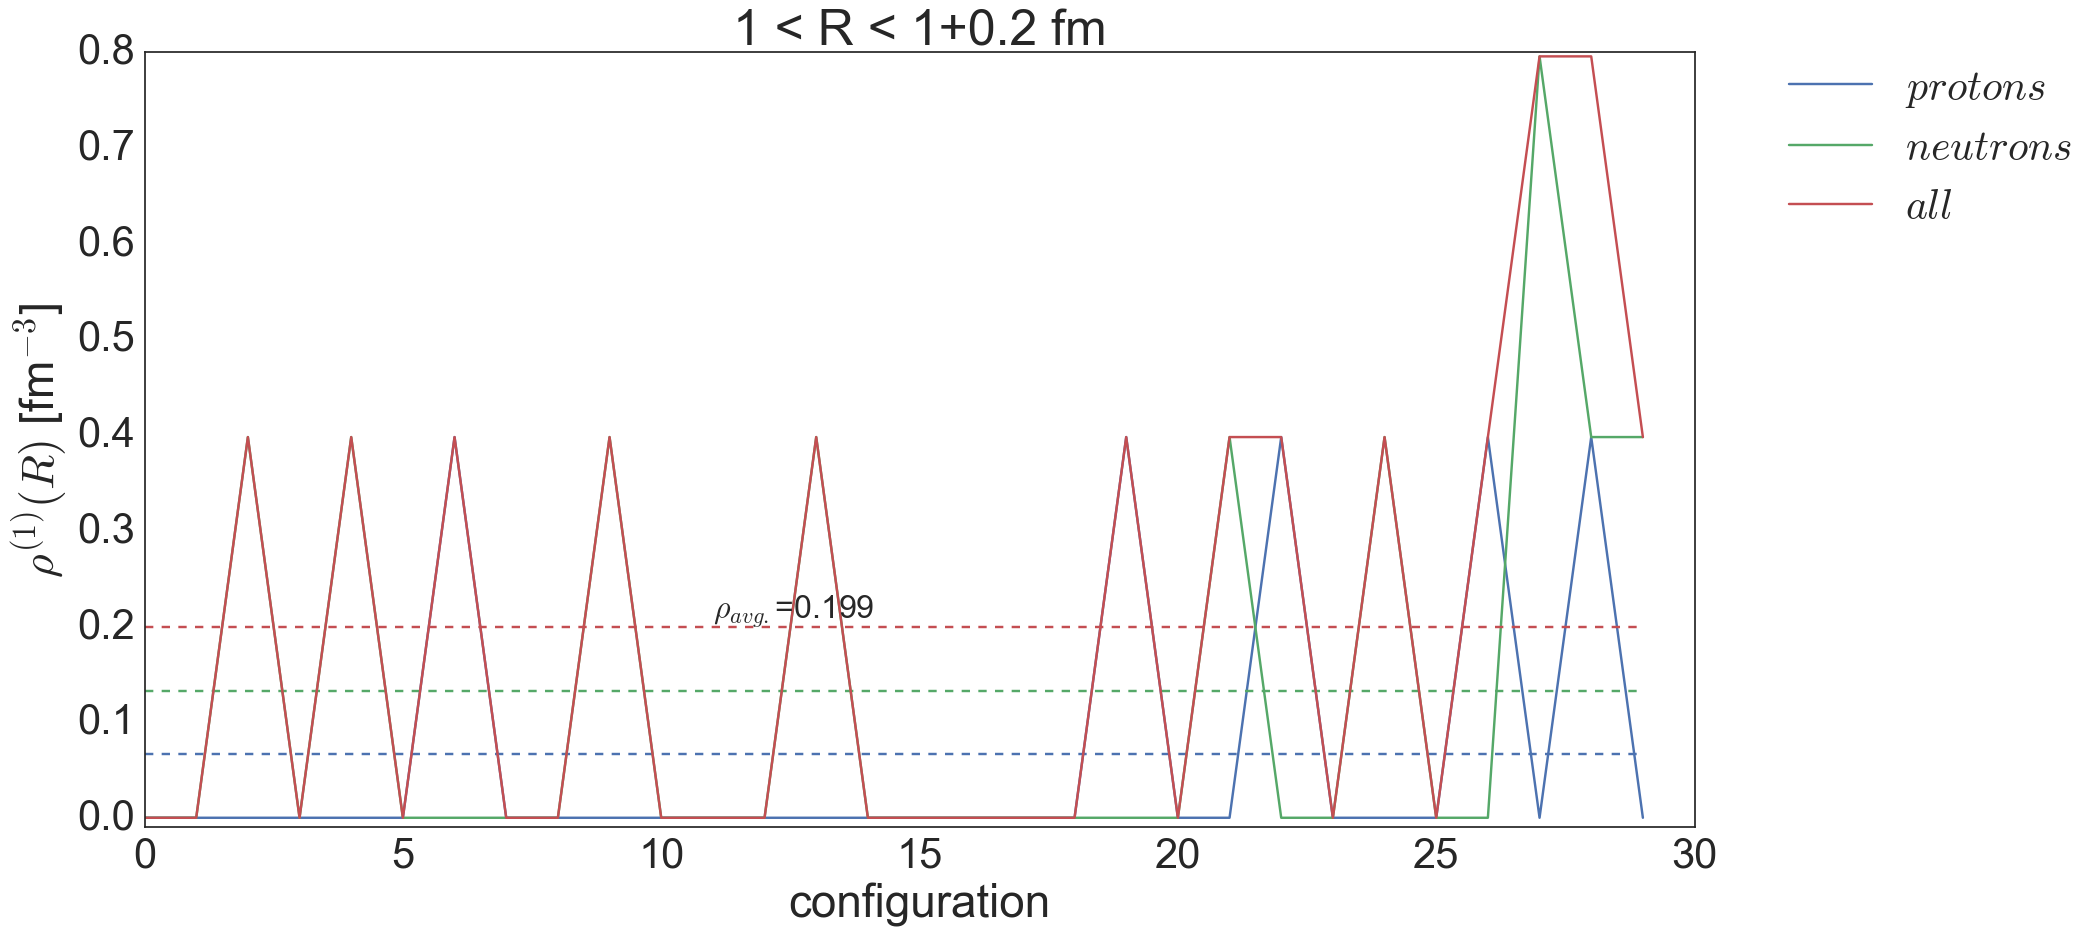

In [100]:
plot_density_in_R(density_1fm , R=1 , dR=0.2 , ylim=(-0.01,0.8) , iStart=0 , NMax=30 ,x_text=11)

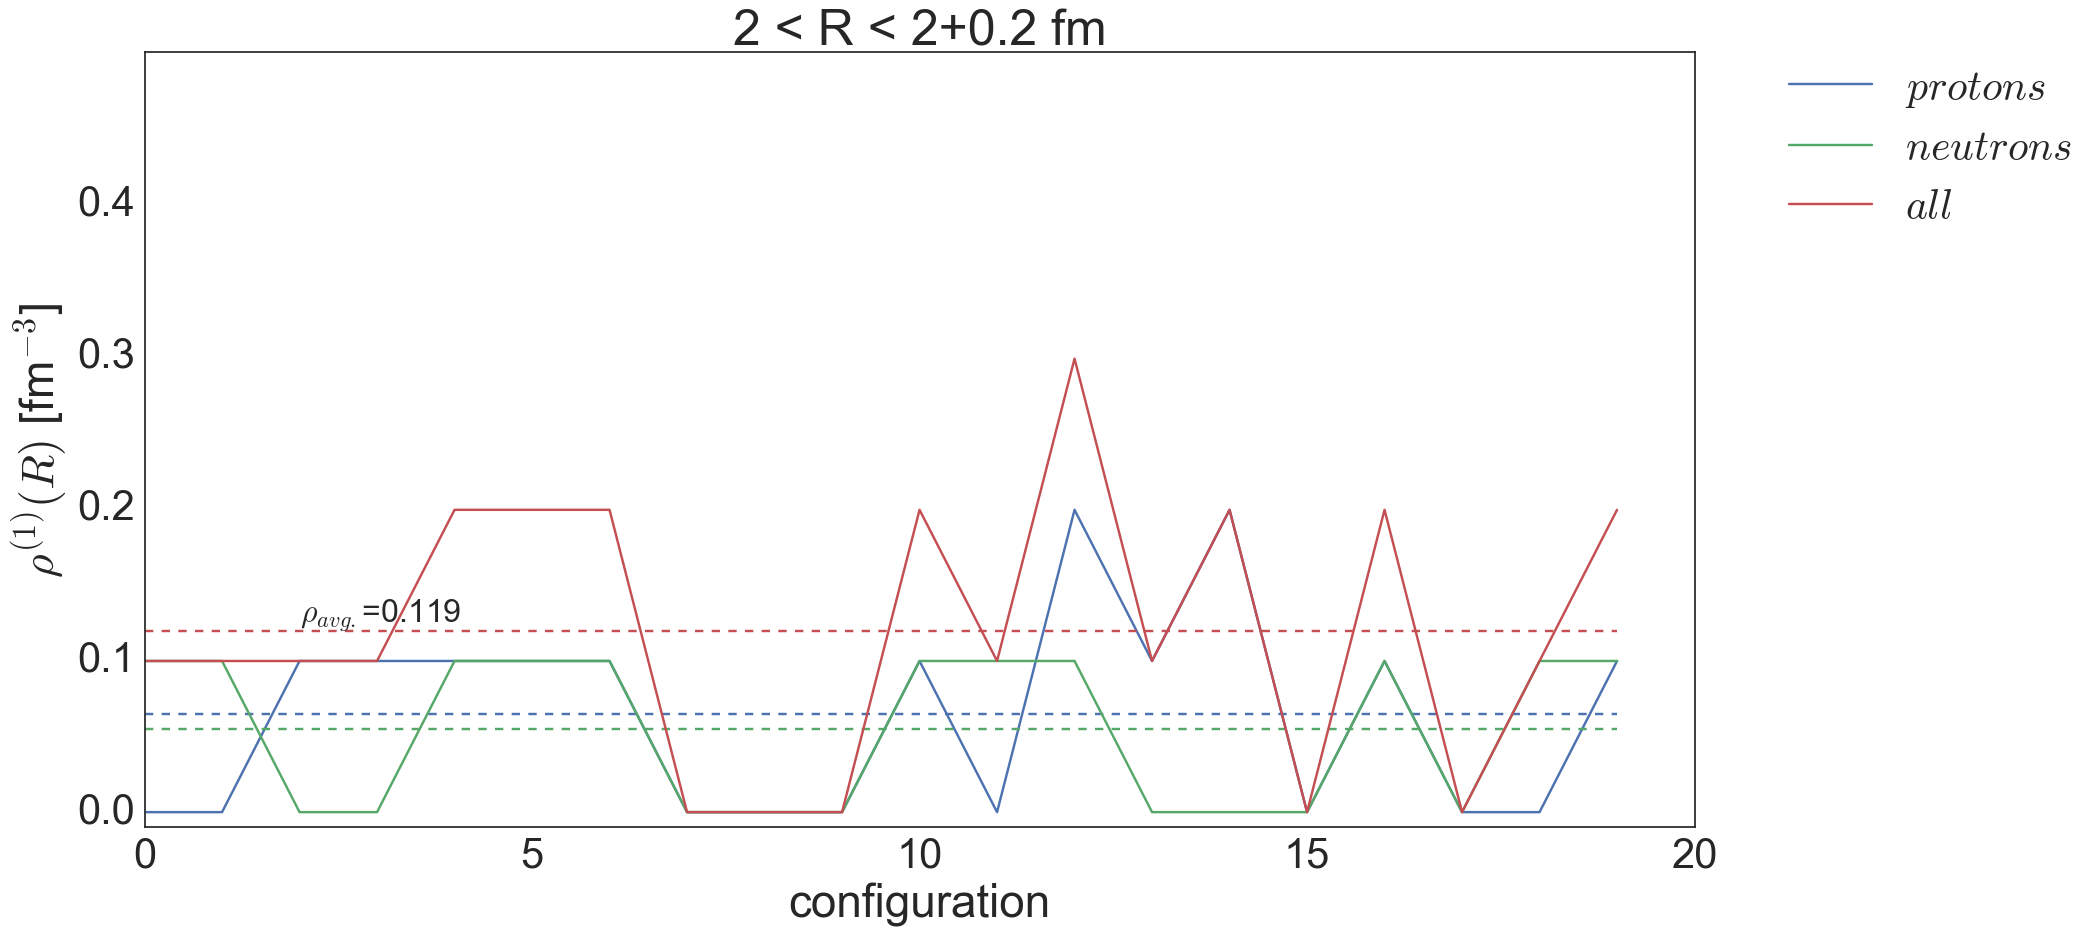

In [102]:
plot_density_in_R(density_2fm , R=2 , dR=0.2 , ylim=(-0.01,0.5) , iStart=0 , NMax=20 ,x_text=2)

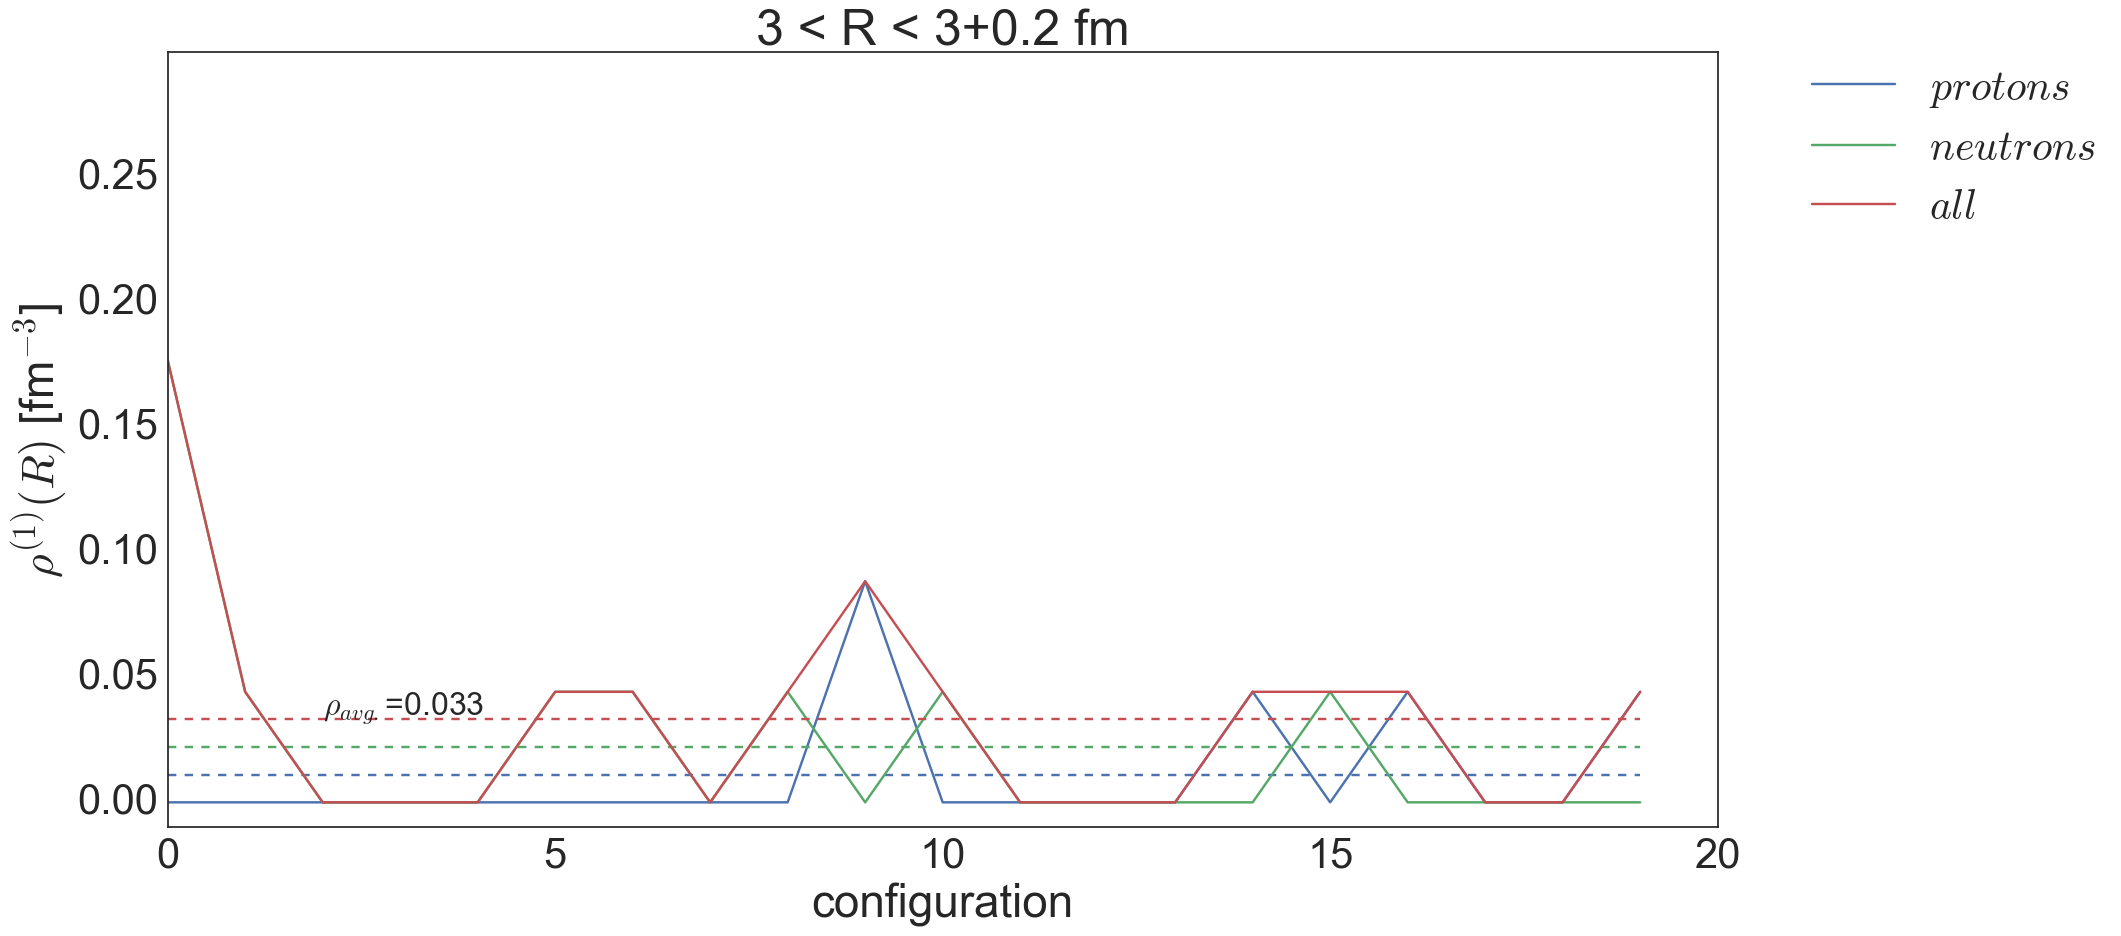

In [103]:
plot_density_in_R(density_3fm , R=3 , dR=0.2 , ylim=(-0.01,0.3) , iStart=0 , NMax=20 ,x_text=2)

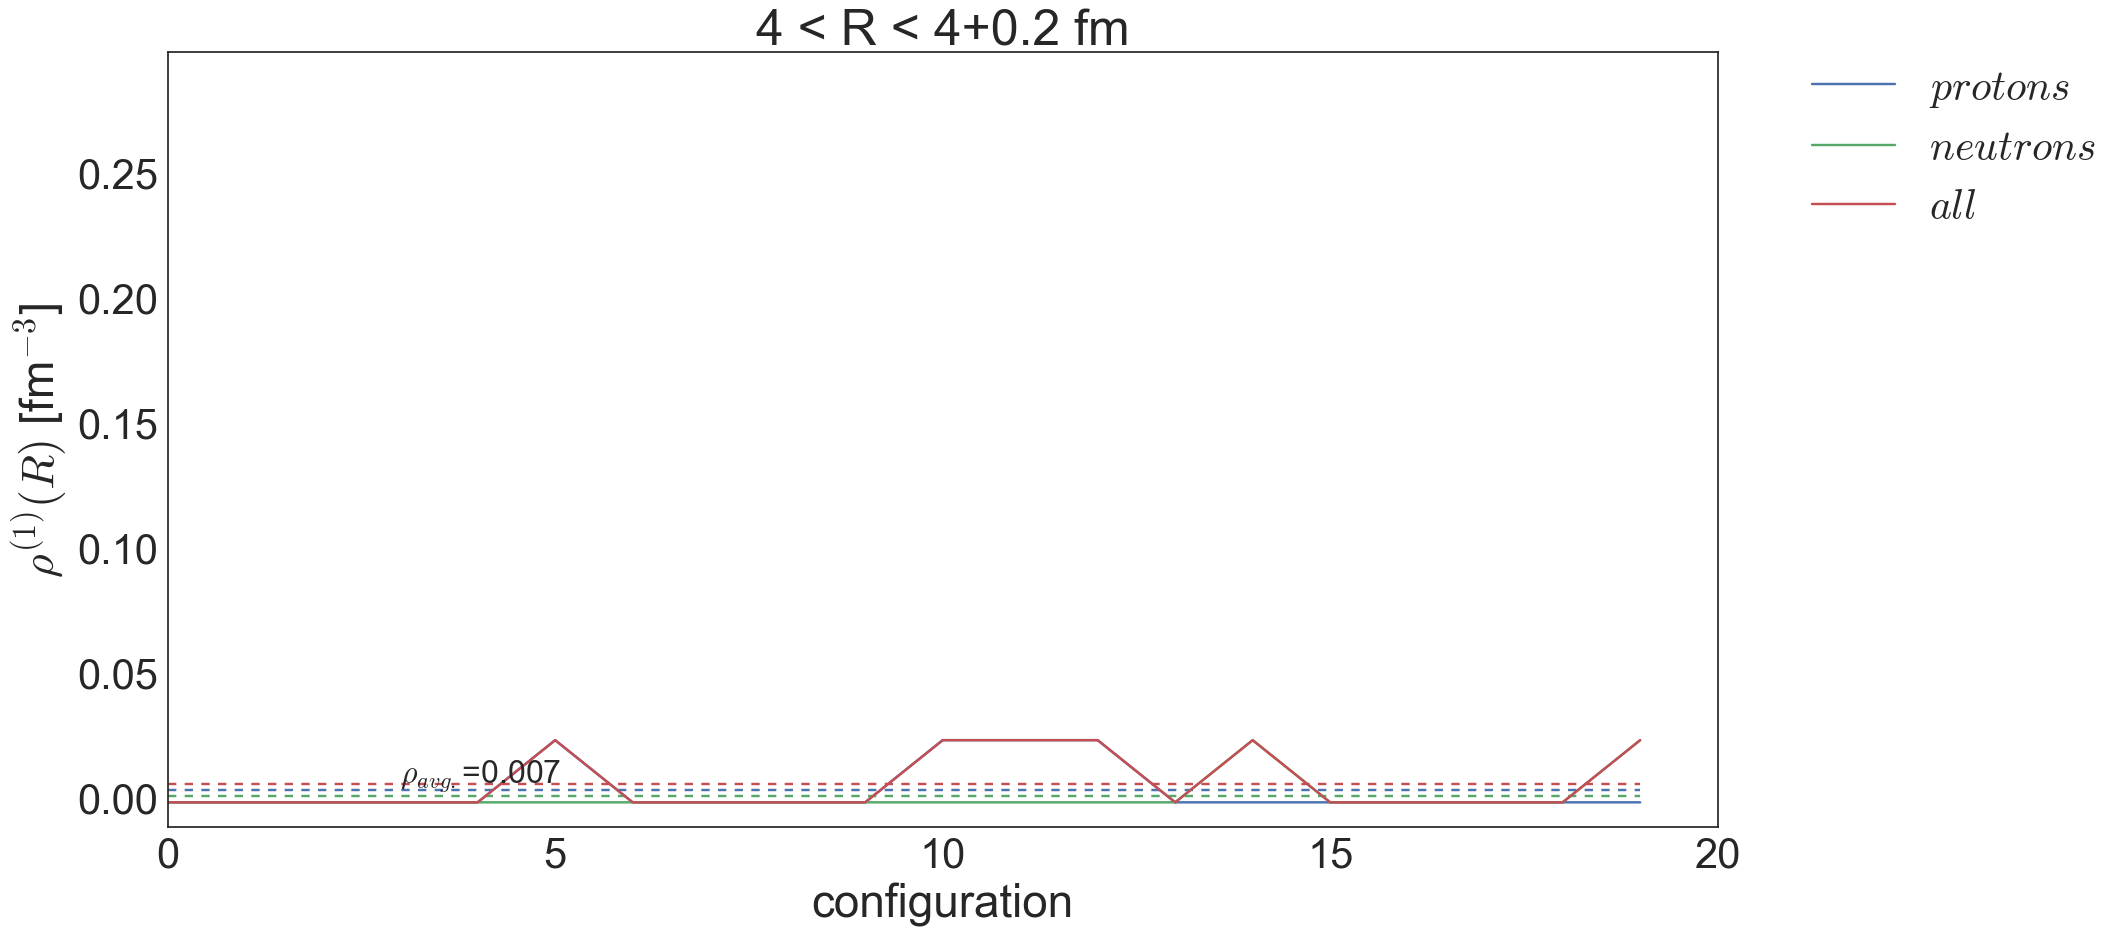

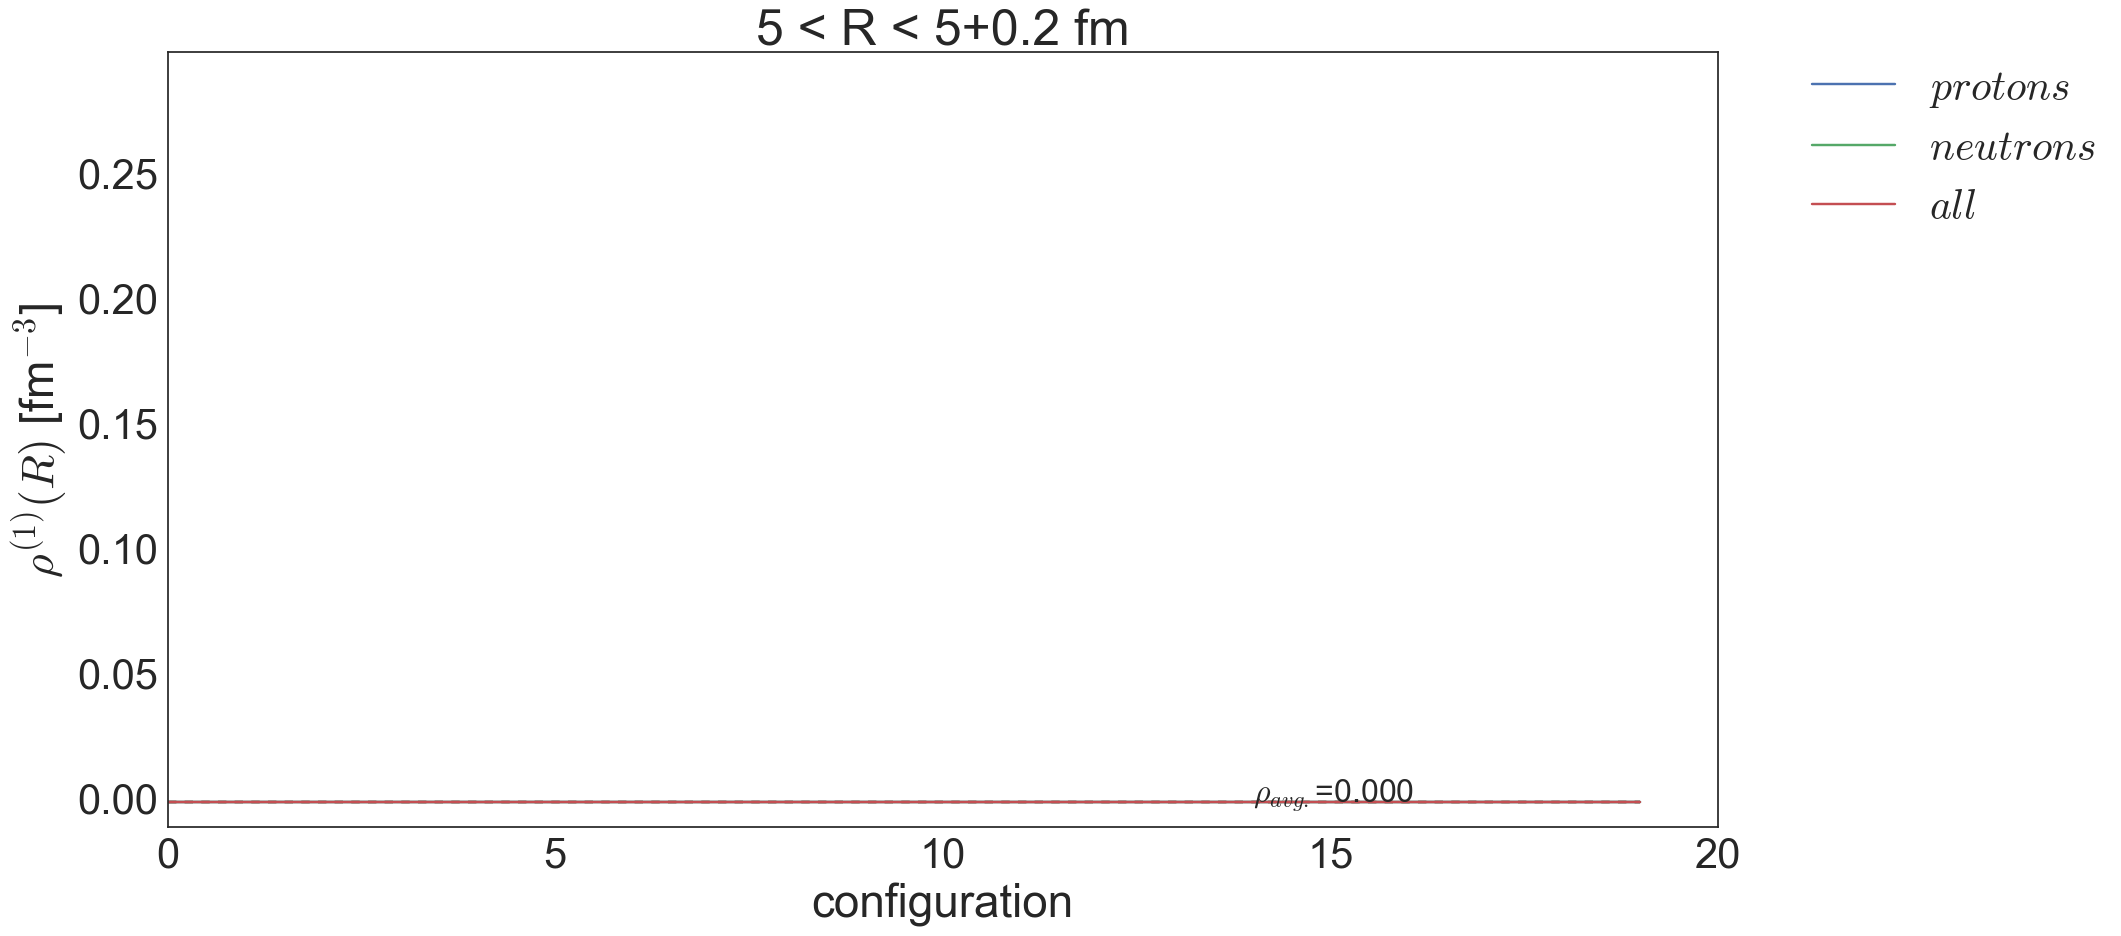

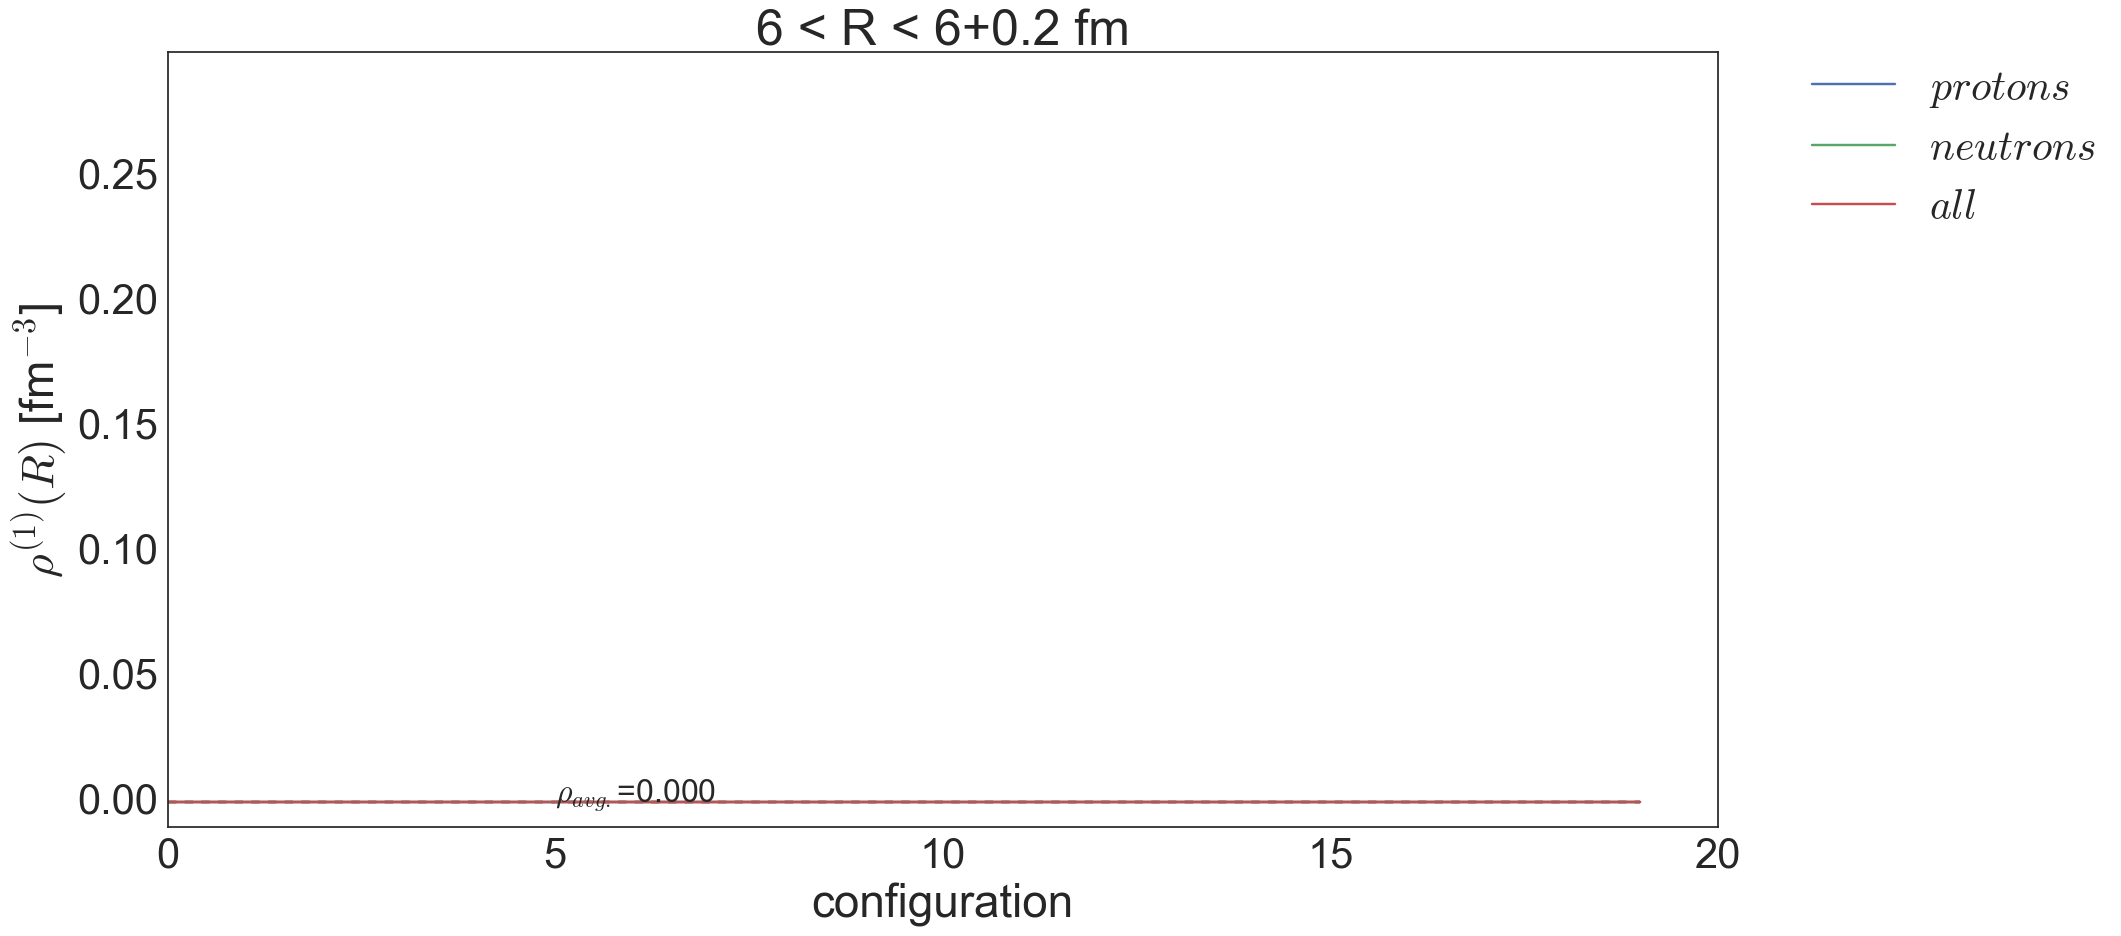

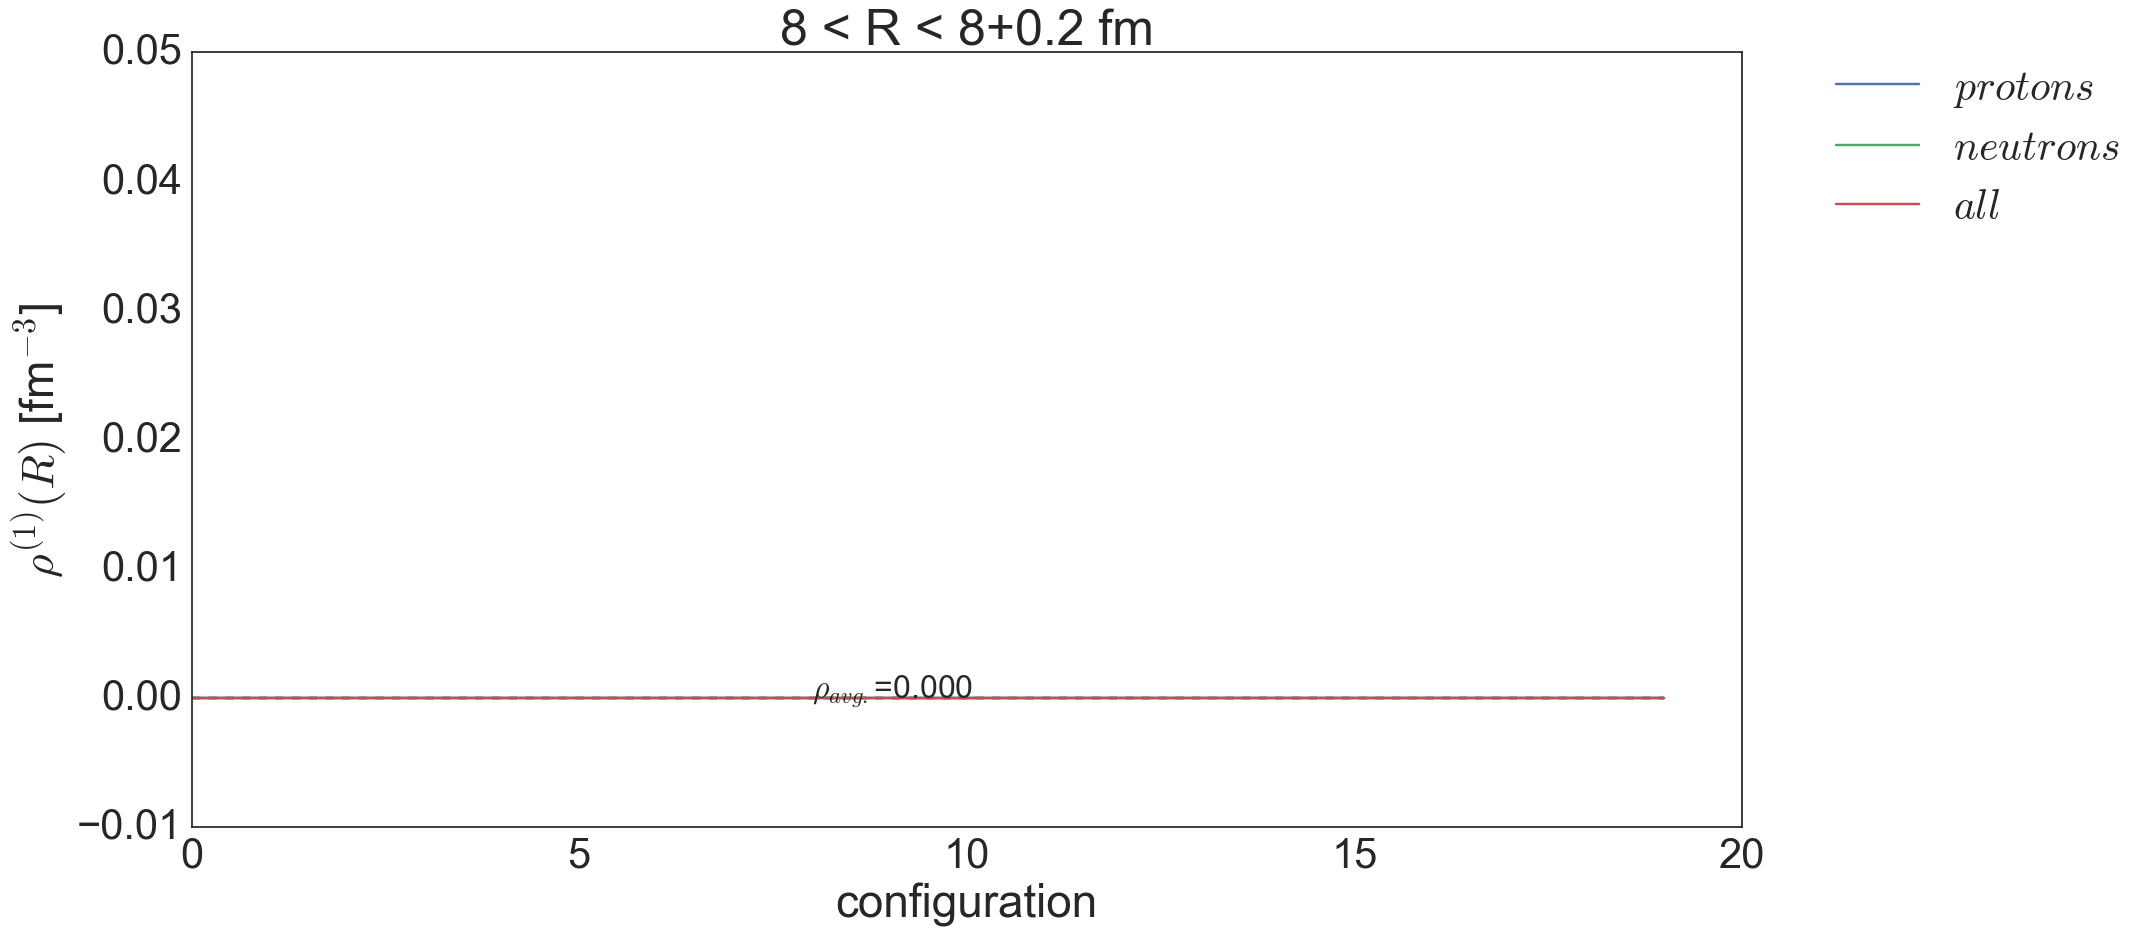

In [104]:
plot_density_in_R(density_4fm , R=4 , dR=0.2 , ylim=(-0.01,0.3) , iStart=0 , NMax=20 ,x_text=3)
plot_density_in_R(density_5fm , R=5 , dR=0.2 , ylim=(-0.01,0.3) , iStart=0 , NMax=20 ,x_text=14)
plot_density_in_R(density_6fm , R=6 , dR=0.2 , ylim=(-0.01,0.3) , iStart=0 , NMax=20 ,x_text=5)
plot_density_in_R(density_8fm , R=8 , dR=0.2 , ylim=(-0.01,0.05) , iStart=0 , NMax=20 ,x_text=8)